In [2]:
#setup for all figures

from pi_or_ci.file_loader import get_all_data_and_cutoffs
from pi_or_ci.transition_plots import plot_transitions,plot_transition_differences
from pi_or_ci.fraction_plotter import plot_fracs_at_temp
from pi_or_ci.contour_plots import plot_contours
from pi_or_ci.cutoff_plots import plot_cutoffs,connect_cutoffs
from pi_or_ci.utils import iscolor,add_custom_legend,all_color_names,\
                                    all_marker_names,all_linestyle_names,cycle_colors,\
                                    get_ions
from pi_or_ci.contour_plots import frac_ratio
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import roman
from pi_or_ci.ionization_energies_explorer import get_energy_cutoffs_dicts,view_energies,view_cutoffs
from pi_or_ci.ionization_energies_explorer import plot_cutoffs_by_energies
from pi_or_ci.coronal_approx import get_coronal_approx,get_cloudy_cie
import matplotlib.pyplot as plt



In [3]:
with open('/Users/claytonstrawn/pi_or_ci/pi_or_ci/background_variation_tables/hm12_alpha_table.txt') as f:
    data = f.readlines()
for line in data:
    exec(line)
with open('/Users/claytonstrawn/pi_or_ci/pi_or_ci/background_variation_tables/hm12_redshift_table.txt') as f:
    s = f.read()
hm12_redshifts = []
xs = {}
ys = {}
for line in s.split('\n'):
    if line == '':
        continue
    elif line[0] == 'z':
        redshift = float(line.split()[2])
        hm12_redshifts.append(redshift)
    elif line.split()[0] == 'old':
        x_or_y = line.split()[2]
    elif line[0] == '[':
        nums_strs = line.strip('[]').split(', ')
        nums = [float(x) for x in nums_strs]
        ary = np.array(nums)
        if x_or_y == 'xs:':
            xs[redshift]=ary
        elif x_or_y == 'ys:':
            ys[redshift]=ary
hm12_redshifts = np.array(hm12_redshifts)

In [4]:
#create the data used for all figures from CLOUDY output tables

#set loud=True to get a full printout of every ions state at every temp

d,c = get_all_data_and_cutoffs(loud=True,threshold = .05,whichzs = 'ints',
                               min_stable_num = 5,whichradfields = ['HM12','a0.28','a0.835','a1.945','a2.5'])
a,io,e,c2 = get_energy_cutoffs_dicts(redshift = 0.0,t_used='min',cutoffs = c)


file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z1.00_HM12.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z1.00_a0.28.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z1.00_a0.835.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z1.00_a1.945.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z1.00_a2.5.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z2.00_HM12.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z2.00_a0.28.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z2.00_a0.835.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z2.00_a1.945.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z2.00_a2.5.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z3.00_HM12.dat not found
file /Users/claytonstrawn/pi_or_ci/pi_or_ci/cloudy_data/Li_z3.00_a

/Users/claytonstrawn/pi_or_ci/pi_or_ci/find_pi_cutoffs.py:30: RuntimeWarning: divide by zero encountered in log10
  log_frac = np.log10(f_i[:,j])
/Users/claytonstrawn/miniconda3/envs/myenv3/lib/python3.9/site-packages/numpy/lib/function_base.py:1281: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])



Al VIII all CI
Al IX all CI
Al X all CI
Al XI all CI
Al XII all CI
Al XIII starts PI, goes CI at 4.21e-02
Al XIV all PI
T=10**6.40,z=0.00
(negligible) Al I is not ionized, but it appears like in CIE
(negligible) Al II has small PI spike at max 3.98e-05, but still CI dominated
(negligible) Al III all CI
(negligible) Al IV all CI
(negligible) Al V all CI
Al VI all CI
Al VII all CI
Al VIII all CI
Al IX all CI
Al X all CI
Al XI all CI
Al XII all CI
Al XIII starts PI, goes CI at 3.03e-03
Al XIV all PI
T=10**6.50,z=0.00
(negligible) Al I is not ionized, but it appears like in CIE
(negligible) Al II has small PI spike at max 1.99e+01, but still CI dominated
(negligible) Al III has small PI spike at max 6.31e-05, but still CI dominated
(negligible) Al IV all CI
(negligible) Al V all CI
(negligible) Al VI all CI
Al VII all CI
Al VIII all CI
Al IX all CI
Al X all CI
Al XI all CI
Al XII all CI
Al XIII starts PI, goes CI at 3.61e-04
Al XIV starts PI, goes CI at 1.05e-03
T=10**6.60,z=0.00
(negligi

Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
Al XIV all PI
T=10**3.10,z=0.00
Al I is not ionized, but it appears like in CIE
Al II has small PI spike at max 2.00e+00, but still CI dominated
Al III all PI
Al IV all PI
Al V all PI
Al VI all PI
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
Al XIV all PI
T=10**3.20,z=0.00
Al I is not ionized, but it appears like in CIE
Al II has small PI spike at max 2.00e+00, but still CI dominated
Al III all PI
Al IV all PI
Al V all PI
Al VI all PI
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
Al XIV all PI
T=10**3.30,z=0.00
Al I is not ionized, but it appears like in CIE
Al II has small PI spike at max 1.58e+00, but still CI dominated
Al III all PI
Al IV all PI
Al V all PI
Al VI all PI
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
Al XIV all PI
T=10**3.40,z=0.00
Al I is not ionized, but it appears

(negligible) Al I is not ionized, but it appears like in CIE
(negligible) Al II all CI
(negligible) Al III all CI
(negligible) Al IV has small PI spike at max 2.00e-01, but still CI dominated
(negligible) Al V all CI
(negligible) Al VI all CI
(negligible) Al VII all CI
(negligible) Al VIII all CI
(negligible) Al IX all CI
(negligible) Al X all CI
Al XI all CI
Al XII all CI
Al XIII all CI
Al XIV all CI
T=10**2.00,z=0.00
Al I is not ionized, but it appears like in CIE
Al II has small PI spike at max 5.01e-02, but still CI dominated
Al III all PI
Al IV all PI
Al V all PI
Al VI all PI
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
Al XIV all PI
T=10**2.10,z=0.00
Al I is not ionized, but it appears like in CIE
Al II has small PI spike at max 6.31e-02, but still CI dominated
Al III all PI
Al IV all PI
Al V all PI
Al VI all PI
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
Al XIV all PI
T=10**2.2

Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
Al XIV all PI
T=10**5.10,z=0.00
(negligible) Al I is not ionized, but it appears like in CIE
Al II has small PI spike at max 1.00e-02, but still CI dominated
Al III has small PI spike at max 3.16e-02, but still CI dominated
Al IV all CI
Al V starts PI, goes CI at 1.59e-01
Al VI starts PI, goes CI at 5.70e+00
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
Al XIV all PI
T=10**5.20,z=0.00
(negligible) Al I is not ionized, but it appears like in CIE
Al II has small PI spike at max 7.94e-03, but still CI dominated
Al III has small PI spike at max 2.51e-02, but still CI dominated
Al IV all CI
Al V starts PI, goes CI at 1.19e-02
Al VI starts PI, goes CI at 1.30e-01
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
Al XIV all PI
T=10**5.30,z=0.00
(negligible) Al I is not ionized, but it appears like in CIE
Al II has small PI spike at max 5.01e-03,

T=10**2.00,z=0.00
Al I is not ionized, but it appears like in CIE
Al II all CI
Al III all PI
Al IV all PI
Al V all PI
Al VI all PI
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
(negligible) Al XIV all CI
T=10**2.10,z=0.00
Al I is not ionized, but it appears like in CIE
Al II all CI
Al III all PI
Al IV all PI
Al V all PI
Al VI all PI
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
(negligible) Al XIV all CI
T=10**2.20,z=0.00
Al I is not ionized, but it appears like in CIE
Al II all CI
Al III all PI
Al IV all PI
Al V all PI
Al VI all PI
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
(negligible) Al XIV all CI
T=10**2.30,z=0.00
Al I is not ionized, but it appears like in CIE
Al II all CI
Al III all PI
Al IV all PI
Al V all PI
Al VI all PI
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
(negligible

(negligible) Al I is not ionized, but it appears like in CIE
(negligible) Al II has small PI spike at max 1.99e+01, but still CI dominated
(negligible) Al III has small PI spike at max 7.94e-06, but still CI dominated
(negligible) Al IV all CI
(negligible) Al V all CI
(negligible) Al VI all CI
(negligible) Al VII all CI
Al VIII all CI
Al IX all CI
Al X all CI
Al XI all CI
Al XII all CI
Al XIII starts PI, goes CI at 2.63e-06
Al XIV starts PI, goes CI at 7.02e-06
T=10**6.70,z=0.00
(negligible) Al I is not ionized, but it appears like in CIE
(negligible) Al II has small PI spike at max 3.16e-06, but still CI dominated
(negligible) Al III has small PI spike at max 5.01e-06, but still CI dominated
(negligible) Al IV all CI
(negligible) Al V all CI
(negligible) Al VI all CI
(negligible) Al VII all CI
Al VIII all CI
Al IX all CI
Al X all CI
Al XI all CI
Al XII all CI
Al XIII starts PI, goes CI at 5.95e-07
Al XIV starts PI, goes CI at 1.63e-06
T=10**6.80,z=0.00
(negligible) Al I is not ionized

T=10**4.90,z=0.00
Al I is not ionized, but it appears like in CIE
Al II all CI
Al III all CI
Al IV all CI
Al V starts PI, goes CI at 1.41e+00
Al VI all PI
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
(negligible) Al XIV all CI
T=10**5.00,z=0.00
Al I is not ionized, but it appears like in CIE
Al II all CI
Al III all CI
Al IV all CI
Al V starts PI, goes CI at 3.18e-02
Al VI all PI
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
Al XIV all PI
T=10**5.10,z=0.00
(negligible) Al I is not ionized, but it appears like in CIE
Al II all CI
Al III all CI
Al IV all CI
Al V starts PI, goes CI at 1.49e-03
Al VI starts PI, goes CI at 1.39e-02
Al VII all PI
Al VIII all PI
Al IX all PI
Al X all PI
Al XI all PI
Al XII all PI
Al XIII all PI
Al XIV all PI
T=10**5.20,z=0.00
(negligible) Al I is not ionized, but it appears like in CIE
Al II all CI
Al III all CI
Al IV all CI
Al V starts PI, goes CI at 1.11e-04


T=10**5.20,z=0.00
(negligible) B I is not ionized, but it appears like in CIE
B II all CI
B III all CI
B IV all CI
B V all PI
B VI all PI
T=10**5.30,z=0.00
(negligible) B I is not ionized, but it appears like in CIE
B II all CI
B III all CI
B IV all CI
B V starts PI, goes CI at 8.97e-01
B VI all PI
T=10**5.40,z=0.00
(negligible) B I is not ionized, but it appears like in CIE
B II all CI
B III all CI
B IV all CI
B V starts PI, goes CI at 3.62e-02
B VI all PI
T=10**5.50,z=0.00
(negligible) B I is not ionized, but it appears like in CIE
B II all CI
B III all CI
B IV all CI
B V starts PI, goes CI at 2.64e-03
B VI starts PI, goes CI at 4.00e-02
T=10**5.60,z=0.00
(negligible) B I is not ionized, but it appears like in CIE
B II all CI
B III all CI
B IV all CI
B V starts PI, goes CI at 2.30e-04
B VI starts PI, goes CI at 2.99e-03
T=10**5.70,z=0.00
(negligible) B I is not ionized, but it appears like in CIE
B II all CI
B III all CI
B IV all CI
B V all CI
B VI starts PI, goes CI at 3.35e-04
T=10

T=10**2.00,z=0.00
B I is not ionized, but it appears like in PIE
B II all PI
If one of B I and B II is PI, they must both be
B III all PI
B IV all PI
B V all PI
B VI all PI
T=10**2.10,z=0.00
B I is not ionized, but it appears like in PIE
B II all PI
If one of B I and B II is PI, they must both be
B III all PI
B IV all PI
B V all PI
B VI all PI
T=10**2.20,z=0.00
B I is not ionized, but it appears like in PIE
B II all PI
If one of B I and B II is PI, they must both be
B III all PI
B IV all PI
B V all PI
B VI all PI
T=10**2.30,z=0.00
B I is not ionized, but it appears like in PIE
B II all PI
If one of B I and B II is PI, they must both be
B III all PI
B IV all PI
B V all PI
B VI all PI
T=10**2.40,z=0.00
B I is not ionized, but it appears like in PIE
B II all PI
If one of B I and B II is PI, they must both be
B III all PI
B IV all PI
B V all PI
B VI all PI
T=10**2.50,z=0.00
B I is not ionized, but it appears like in PIE
B II all PI
If one of B I and B II is PI, they must both be
B III all 

B I is not ionized, but it appears like in PIE
B II all PI
If one of B I and B II is PI, they must both be
B III all PI
B IV all PI
B V all PI
B VI all PI
T=10**3.60,z=0.00
B I is not ionized, but it appears like in PIE
B II all PI
If one of B I and B II is PI, they must both be
B III all PI
B IV all PI
B V all PI
B VI all PI
T=10**3.70,z=0.00
B I is not ionized, but it appears like in PIE
B II all PI
If one of B I and B II is PI, they must both be
B III all PI
B IV all PI
B V all PI
B VI all PI
T=10**3.80,z=0.00
B I is not ionized, but it appears like in PIE
B II all PI
If one of B I and B II is PI, they must both be
B III all PI
B IV all PI
B V all PI
B VI all PI
T=10**3.90,z=0.00
B I is not ionized, but it appears like in PIE
B II all PI
If one of B I and B II is PI, they must both be
B III all PI
B IV all PI
B V all PI
B VI all PI
T=10**4.00,z=0.00
B I is not ionized, but it appears like in PIE
B II all PI
If one of B I and B II is PI, they must both be
B III all PI
B IV all PI
B V

no transition found, but B I switched from PI to CI at t=1.26e+04
B I is not ionized, but it appears like in CIE
no transition found, but B II switched from PI to CI at t=1.26e+04
B II all CI
B III all PI
B IV all PI
B V all PI
B VI all PI
T=10**4.20,z=0.00
B I is not ionized, but it appears like in CIE
B II all CI
B III all PI
B IV all PI
B V all PI
B VI all PI
T=10**4.30,z=0.00
B I is not ionized, but it appears like in CIE
B II all CI
B III starts PI, goes CI at 2.35e-01
B IV all PI
B V all PI
B VI all PI
T=10**4.40,z=0.00
B I is not ionized, but it appears like in CIE
B II all CI
B III starts PI, goes CI at 8.98e-03
B IV all PI
B V all PI
B VI all PI
T=10**4.50,z=0.00
B I is not ionized, but it appears like in CIE
B II all CI
B III starts PI, goes CI at 6.75e-04
B IV starts PI, goes CI at 1.20e-01
B V all PI
B VI all PI
T=10**4.60,z=0.00
B I is not ionized, but it appears like in CIE
B II all CI
B III has small PI spike at max 1.58e-05, but still CI dominated
B IV starts PI, goes C

T=10**2.00,z=0.00
Be I is not ionized, but it appears like in CIE
Be II all PI
If one of Be I and Be II is PI, they must both be
Be III all PI
Be IV all PI
Be V all PI
T=10**2.10,z=0.00
no transition found, but Be I switched from PI to CI at t=1.26e+02
Be I is not ionized, but it appears like in CIE
Be II all PI
If one of Be I and Be II is PI, they must both be
Be III all PI
Be IV all PI
Be V all PI
T=10**2.20,z=0.00
no transition found, but Be I switched from PI to CI at t=1.58e+02
Be I is not ionized, but it appears like in CIE
Be II all PI
If one of Be I and Be II is PI, they must both be
Be III all PI
Be IV all PI
Be V all PI
T=10**2.30,z=0.00
no transition found, but Be I switched from PI to CI at t=2.00e+02
Be I is not ionized, but it appears like in CIE
Be II all PI
If one of Be I and Be II is PI, they must both be
Be III all PI
Be IV all PI
Be V all PI
T=10**2.40,z=0.00
no transition found, but Be I switched from PI to CI at t=2.51e+02
Be I is not ionized, but it appears like i

(negligible) Be I is not ionized, but it appears like in CIE
(negligible) Be II has small PI spike at max 3.16e-05, but still CI dominated
Be III all CI
Be IV all CI
Be V all CI
T=10**7.20,z=0.00
(negligible) Be I is not ionized, but it appears like in CIE
(negligible) Be II has small PI spike at max 3.16e-05, but still CI dominated
(negligible) Be III all CI
Be IV all CI
Be V all CI
T=10**7.30,z=0.00
(negligible) Be I is not ionized, but it appears like in CIE
(negligible) Be II has small PI spike at max 3.16e-05, but still CI dominated
(negligible) Be III all CI
Be IV all CI
Be V all CI
T=10**7.40,z=0.00
(negligible) Be I is not ionized, but it appears like in CIE
(negligible) Be II has small PI spike at max 3.98e-05, but still CI dominated
(negligible) Be III all CI
Be IV all CI
Be V all CI
T=10**7.50,z=0.00
(negligible) Be I is not ionized, but it appears like in CIE
(negligible) Be II has small PI spike at max 3.98e-05, but still CI dominated
(negligible) Be III all CI
Be IV all C

no transition found, but Be I switched from PI to CI at t=3.16e+02
Be I is not ionized, but it appears like in CIE
Be II all PI
If one of Be I and Be II is PI, they must both be
Be III all PI
Be IV all PI
Be V all PI
T=10**2.60,z=0.00
no transition found, but Be I switched from PI to CI at t=3.98e+02
Be I is not ionized, but it appears like in CIE
Be II all PI
If one of Be I and Be II is PI, they must both be
Be III all PI
Be IV all PI
Be V all PI
T=10**2.70,z=0.00
no transition found, but Be I switched from PI to CI at t=5.01e+02
Be I is not ionized, but it appears like in CIE
Be II all PI
If one of Be I and Be II is PI, they must both be
Be III all PI
Be IV all PI
Be V all PI
T=10**2.80,z=0.00
no transition found, but Be I switched from PI to CI at t=6.31e+02
Be I is not ionized, but it appears like in CIE
Be II all PI
If one of Be I and Be II is PI, they must both be
Be III all PI
Be IV all PI
Be V all PI
T=10**2.90,z=0.00
no transition found, but Be I switched from PI to CI at t=7.

C I is not ionized, but it appears like in CIE
C II all CI
C III all CI
C IV starts PI, goes CI at 1.25e-03
C V starts PI, goes CI at 5.06e-01
C VI all PI
C VII all PI
T=10**4.90,z=0.00
C I is not ionized, but it appears like in CIE
C II all CI
C III all CI
C IV has small PI spike at max 2.51e-05, but still CI dominated
C V starts PI, goes CI at 9.09e-03
C VI all PI
C VII all PI
T=10**5.00,z=0.00
C I is not ionized, but it appears like in CIE
C II all CI
C III all CI
C IV all CI
C V starts PI, goes CI at 5.27e-04
C VI all PI
C VII all PI
T=10**5.10,z=0.00
C I is not ionized, but it appears like in CIE
C II all CI
C III all CI
C IV all CI
C V all CI
C VI all PI
C VII all PI
T=10**5.20,z=0.00
C I is not ionized, but it appears like in CIE
C II all CI
C III all CI
C IV all CI
C V all CI
C VI all PI
C VII all PI
T=10**5.30,z=0.00
(negligible) C I is not ionized, but it appears like in CIE
C II all CI
C III all CI
C IV all CI
C V all CI
C VI all PI
C VII all PI
T=10**5.40,z=0.00
(negligible

C I is not ionized, but it appears like in CIE
C II all CI
C III all CI
C IV all CI
C V starts PI, goes CI at 1.54e-02
C VI all PI
C VII all PI
T=10**5.10,z=0.00
C I is not ionized, but it appears like in CIE
C II all CI
C III all CI
C IV all CI
C V all CI
C VI all PI
C VII all PI
T=10**5.20,z=0.00
C I is not ionized, but it appears like in CIE
C II all CI
C III all CI
C IV all CI
C V all CI
C VI all PI
C VII all PI
T=10**5.30,z=0.00
(negligible) C I is not ionized, but it appears like in CIE
C II all CI
C III all CI
C IV all CI
C V all CI
C VI all PI
C VII all PI
T=10**5.40,z=0.00
(negligible) C I is not ionized, but it appears like in CIE
C II all CI
C III all CI
C IV all CI
C V all CI
C VI all PI
C VII all PI
T=10**5.50,z=0.00
(negligible) C I is not ionized, but it appears like in CIE
C II all CI
C III all CI
C IV all CI
C V all CI
C VI all PI
C VII all PI
T=10**5.60,z=0.00
(negligible) C I is not ionized, but it appears like in CIE
(negligible) C II has small PI spike at max 3.16e

C VII starts PI, goes CI at 1.07e-02
T=10**5.90,z=0.00
(negligible) C I is not ionized, but it appears like in CIE
(negligible) C II all CI
C III all CI
C IV all CI
C V all CI
C VI has small PI spike at max 3.98e-05, but still CI dominated
C VII starts PI, goes CI at 1.43e-03
T=10**6.00,z=0.00
(negligible) C I is not ionized, but it appears like in CIE
(negligible) C II all CI
C III all CI
C IV all CI
C V all CI
C VI all CI
C VII starts PI, goes CI at 2.03e-04
T=10**6.10,z=0.00
(negligible) C I is not ionized, but it appears like in CIE
(negligible) C II all CI
C III all CI
C IV all CI
C V all CI
C VI all CI
C VII starts PI, goes CI at 2.82e-06
T=10**6.20,z=0.00
(negligible) C I is not ionized, but it appears like in CIE
(negligible) C II all CI
(negligible) C III all CI
C IV all CI
C V all CI
C VI all CI
C VII all CI
T=10**6.30,z=0.00
(negligible) C I is not ionized, but it appears like in CIE
(negligible) C II all CI
(negligible) C III all CI
C IV all CI
C V all CI
C VI all CI
C VII 

T=10**2.00,z=0.00
C I is not ionized, but it appears like in CIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**2.10,z=0.00
no transition found, but C I switched from PI to CI at t=1.26e+02
C I is not ionized, but it appears like in CIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**2.20,z=0.00
no transition found, but C I switched from PI to CI at t=1.58e+02
C I is not ionized, but it appears like in CIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**2.30,z=0.00
no transition found, but C I switched from PI to CI at t=2.00e+02
C I is not ionized, but it appears like in CIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**2.40,z=0.00
no transition found, but C I switched fr

C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**2.60,z=1.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**2.70,z=1.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**2.80,z=1.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**2.90,z=1.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**3.00,z=1.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C

C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**3.40,z=2.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**3.50,z=2.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**3.60,z=2.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**3.70,z=2.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**3.80,z=2.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all 

C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**3.70,z=3.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**3.80,z=3.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**3.90,z=3.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**4.00,z=3.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**4.10,z=3.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C

C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**3.80,z=4.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**3.90,z=4.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**4.00,z=4.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**4.10,z=4.00
C I is not ionized, but it appears like in PIE
C II all PI
If one of C I and C II is PI, they must both be
C III all PI
C IV all PI
C V all PI
C VI all PI
C VII all PI
T=10**4.20,z=4.00
C I is not ionized, but it appears like in PIE
no transition found, bu

(negligible) F I is not ionized, but it appears like in CIE
(negligible) F II has small PI spike at max 2.51e-03, but still CI dominated
(negligible) F III has small PI spike at max 5.01e-05, but still CI dominated
(negligible) F IV all CI
(negligible) F V all CI
F VI all CI
F VII all CI
F VIII all CI
F IX all CI
F X all CI
T=10**6.80,z=0.00
(negligible) F I is not ionized, but it appears like in CIE
(negligible) F II has small PI spike at max 5.01e-02, but still CI dominated
(negligible) F III has small PI spike at max 3.16e-05, but still CI dominated
(negligible) F IV all CI
(negligible) F V all CI
F VI all CI
F VII all CI
F VIII all CI
F IX all CI
F X all CI
T=10**6.90,z=0.00
(negligible) F I is not ionized, but it appears like in CIE
(negligible) F II has small PI spike at max 7.94e-01, but still CI dominated
(negligible) F III has small PI spike at max 2.51e-05, but still CI dominated
(negligible) F IV all CI
(negligible) F V all CI
(negligible) F VI all CI
F VII all CI
F VIII all

no transition found, but F I switched from PI to CI at t=1.26e+04
F I is not ionized, but it appears like in CIE
F II all PI
If one of F I and F II is PI, they must both be
F III all PI
F IV all PI
F V all PI
F VI all PI
F VII all PI
F VIII all PI
F IX all PI
F X all PI
T=10**4.20,z=0.00
no transition found, but F I switched from PI to CI at t=1.58e+04
F I is not ionized, but it appears like in CIE
no transition found, but F II switched from PI to CI at t=1.58e+04
F II has small PI spike at max 5.01e-03, but still CI dominated
F III all PI
F IV all PI
F V all PI
F VI all PI
F VII all PI
F VIII all PI
F IX all PI
F X all PI
T=10**4.30,z=0.00
F I is not ionized, but it appears like in CIE
F II has small PI spike at max 1.26e-01, but still CI dominated
F III all PI
F IV all PI
F V all PI
F VI all PI
F VII all PI
F VIII all PI
F IX all PI
F X all PI
T=10**4.40,z=0.00
F I is not ionized, but it appears like in CIE
F II has small PI spike at max 6.31e-01, but still CI dominated
F III all PI


no transition found, but F I switched from PI to CI at t=5.01e+02
F I is not ionized, but it appears like in CIE
F II all PI
If one of F I and F II is PI, they must both be
F III all PI
F IV all PI
F V all PI
F VI all PI
F VII all PI
F VIII all PI
F IX all PI
F X all PI
T=10**2.80,z=0.00
no transition found, but F I switched from PI to CI at t=6.31e+02
F I is not ionized, but it appears like in CIE
F II all PI
If one of F I and F II is PI, they must both be
F III all PI
F IV all PI
F V all PI
F VI all PI
F VII all PI
F VIII all PI
F IX all PI
F X all PI
T=10**2.90,z=0.00
no transition found, but F I switched from PI to CI at t=7.94e+02
F I is not ionized, but it appears like in CIE
F II all PI
If one of F I and F II is PI, they must both be
F III all PI
F IV all PI
F V all PI
F VI all PI
F VII all PI
F VIII all PI
F IX all PI
F X all PI
T=10**3.00,z=0.00
no transition found, but F I switched from PI to CI at t=1.00e+03
F I is not ionized, but it appears like in CIE
F II all PI
If one o

T=10**2.00,z=0.00
F I is not ionized, but it appears like in CIE
F II all PI
If one of F I and F II is PI, they must both be
F III all PI
F IV all PI
F V all PI
F VI all PI
F VII all PI
F VIII all PI
F IX all PI
F X all PI
T=10**2.10,z=0.00
no transition found, but F I switched from PI to CI at t=1.26e+02
F I is not ionized, but it appears like in CIE
F II all PI
If one of F I and F II is PI, they must both be
F III all PI
F IV all PI
F V all PI
F VI all PI
F VII all PI
F VIII all PI
F IX all PI
F X all PI
T=10**2.20,z=0.00
no transition found, but F I switched from PI to CI at t=1.58e+02
F I is not ionized, but it appears like in CIE
F II all PI
If one of F I and F II is PI, they must both be
F III all PI
F IV all PI
F V all PI
F VI all PI
F VII all PI
F VIII all PI
F IX all PI
F X all PI
T=10**2.30,z=0.00
no transition found, but F I switched from PI to CI at t=2.00e+02
F I is not ionized, but it appears like in CIE
F II all PI
If one of F I and F II is PI, they must both be
F III al

F IX all CI
F X all CI
T=10**7.20,z=0.00
(negligible) F I is not ionized, but it appears like in CIE
(negligible) F II all PI
If one of F I and F II is PI, they must both be
(negligible) F III has small PI spike at max 2.51e-06, but still CI dominated
(negligible) F IV all CI
(negligible) F V all CI
(negligible) F VI all CI
F VII all CI
F VIII all CI
F IX all CI
F X all CI
T=10**7.30,z=0.00
(negligible) F I is not ionized, but it appears like in CIE
(negligible) F II has small PI spike at max 7.94e-06, but still CI dominated
(negligible) F III all CI
(negligible) F IV all CI
(negligible) F V all CI
(negligible) F VI all CI
F VII all CI
F VIII all CI
F IX all CI
F X all CI
T=10**7.40,z=0.00
(negligible) F I is not ionized, but it appears like in CIE
(negligible) F II has small PI spike at max 7.94e-06, but still CI dominated
(negligible) F III all CI
(negligible) F IV all CI
(negligible) F V all CI
(negligible) F VI all CI
F VII all CI
F VIII all CI
F IX all CI
F X all CI
T=10**7.50,z=0

T=10**2.00,z=0.00
Li I is not ionized, but it appears like in PIE
Li II all PI
If one of Li I and Li II is PI, they must both be
Li III all PI
Li IV all PI
T=10**2.10,z=0.00
Li I is not ionized, but it appears like in PIE
Li II all PI
If one of Li I and Li II is PI, they must both be
Li III all PI
Li IV all PI
T=10**2.20,z=0.00
Li I is not ionized, but it appears like in PIE
Li II all PI
If one of Li I and Li II is PI, they must both be
Li III all PI
Li IV all PI
T=10**2.30,z=0.00
Li I is not ionized, but it appears like in PIE
Li II all PI
If one of Li I and Li II is PI, they must both be
Li III all PI
Li IV all PI
T=10**2.40,z=0.00
Li I is not ionized, but it appears like in PIE
Li II all PI
If one of Li I and Li II is PI, they must both be
Li III all PI
Li IV all PI
T=10**2.50,z=0.00
Li I is not ionized, but it appears like in PIE
Li II all PI
If one of Li I and Li II is PI, they must both be
Li III all PI
Li IV all PI
T=10**2.60,z=0.00
Li I is not ionized, but it appears like in PI

(negligible) Li I is not ionized, but it appears like in CIE
Li II all CI
Li III all CI
Li IV all CI
T=10**5.90,z=0.00
(negligible) Li I is not ionized, but it appears like in CIE
Li II all CI
Li III all CI
Li IV all CI
T=10**6.00,z=0.00
(negligible) Li I is not ionized, but it appears like in CIE
Li II all CI
Li III all CI
Li IV all CI
T=10**6.10,z=0.00
(negligible) Li I is not ionized, but it appears like in CIE
Li II all CI
Li III all CI
Li IV all CI
T=10**6.20,z=0.00
(negligible) Li I is not ionized, but it appears like in CIE
Li II all CI
Li III all CI
Li IV all CI
T=10**6.30,z=0.00
(negligible) Li I is not ionized, but it appears like in CIE
Li II all CI
Li III all CI
Li IV all CI
T=10**6.40,z=0.00
(negligible) Li I is not ionized, but it appears like in CIE
Li II all CI
Li III all CI
Li IV all CI
T=10**6.50,z=0.00
(negligible) Li I is not ionized, but it appears like in CIE
Li II all CI
Li III all CI
Li IV all CI
T=10**6.60,z=0.00
(negligible) Li I is not ionized, but it appears

Li I is not ionized, but it appears like in PIE
Li II all PI
If one of Li I and Li II is PI, they must both be
Li III all PI
Li IV all PI
T=10**2.20,z=0.00
Li I is not ionized, but it appears like in PIE
Li II all PI
If one of Li I and Li II is PI, they must both be
Li III all PI
Li IV all PI
T=10**2.30,z=0.00
Li I is not ionized, but it appears like in PIE
Li II all PI
If one of Li I and Li II is PI, they must both be
Li III all PI
Li IV all PI
T=10**2.40,z=0.00
Li I is not ionized, but it appears like in PIE
Li II all PI
If one of Li I and Li II is PI, they must both be
Li III all PI
Li IV all PI
T=10**2.50,z=0.00
Li I is not ionized, but it appears like in PIE
Li II all PI
If one of Li I and Li II is PI, they must both be
Li III all PI
Li IV all PI
T=10**2.60,z=0.00
Li I is not ionized, but it appears like in PIE
Li II all PI
If one of Li I and Li II is PI, they must both be
Li III all PI
Li IV all PI
T=10**2.70,z=0.00
Li I is not ionized, but it appears like in PIE
Li II all PI
If 

Li II all CI
Li III starts PI, goes CI at 1.81e+00
Li IV all PI
T=10**4.80,z=0.00
Li I is not ionized, but it appears like in CIE
Li II all CI
Li III starts PI, goes CI at 4.54e-02
Li IV all PI
T=10**4.90,z=0.00
Li I is not ionized, but it appears like in CIE
Li II all CI
Li III starts PI, goes CI at 2.17e-03
Li IV all PI
T=10**5.00,z=0.00
Li I is not ionized, but it appears like in CIE
Li II all CI
Li III starts PI, goes CI at 6.07e-05
Li IV starts PI, goes CI at 1.70e-02
T=10**5.10,z=0.00
Li I is not ionized, but it appears like in CIE
Li II all CI
Li III all CI
Li IV starts PI, goes CI at 8.25e-04
T=10**5.20,z=0.00
Li I is not ionized, but it appears like in CIE
Li II all CI
Li III all CI
Li IV starts PI, goes CI at 6.21e-05
T=10**5.30,z=0.00
Li I is not ionized, but it appears like in CIE
Li II all CI
Li III all CI
Li IV starts PI, goes CI at 1.87e-06
T=10**5.40,z=0.00
(negligible) Li I is not ionized, but it appears like in CIE
Li II all CI
Li III all CI
Li IV all CI
T=10**5.50,z=

Mg XIII all PI
T=10**6.00,z=0.00
(negligible) Mg I is not ionized, but it appears like in CIE
(negligible) Mg II has small PI spike at max 1.59e-04, but still CI dominated
(negligible) Mg III all CI
Mg IV all CI
Mg V all CI
Mg VI all CI
Mg VII all CI
Mg VIII all CI
Mg IX all CI
Mg X all CI
Mg XI starts PI, goes CI at 1.14e-05
Mg XII all PI
Mg XIII all PI
T=10**6.10,z=0.00
(negligible) Mg I is not ionized, but it appears like in CIE
(negligible) Mg II has small PI spike at max 1.59e-04, but still CI dominated
(negligible) Mg III all CI
(negligible) Mg IV all CI
Mg V all CI
Mg VI all CI
Mg VII all CI
Mg VIII all CI
Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII all PI
Mg XIII all PI
T=10**6.20,z=0.00
(negligible) Mg I is not ionized, but it appears like in CIE
(negligible) Mg II has small PI spike at max 1.26e-04, but still CI dominated
(negligible) Mg III all CI
(negligible) Mg IV all CI
Mg V all CI
Mg VI all CI
Mg VII all CI
Mg VIII all CI
Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII sta

Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**3.40,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II has small PI spike at max 5.01e+00, but still CI dominated
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**3.50,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II has small PI spike at max 5.01e+00, but still CI dominated
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**3.60,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II has small PI spike at max 5.01e+00, but still CI dominated
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**3.70,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II has small PI spike at ma

(negligible) Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII all CI
Mg XIII all CI
T=10**2.00,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II starts PI, goes CI at 5.26e-01
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**2.10,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II starts PI, goes CI at 3.69e-01
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**2.20,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II starts PI, goes CI at 2.35e-01
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**2.30,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II starts PI, goes CI at 1.31e-01
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all P

(negligible) Mg I is not ionized, but it appears like in CIE
Mg II has small PI spike at max 1.99e-02, but still CI dominated
Mg III has small PI spike at max 1.99e-02, but still CI dominated
Mg IV all CI
Mg V starts PI, goes CI at 3.03e-03
Mg VI starts PI, goes CI at 8.59e-02
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**5.30,z=0.00
(negligible) Mg I is not ionized, but it appears like in CIE
Mg II has small PI spike at max 1.00e-02, but still CI dominated
Mg III has small PI spike at max 1.00e-02, but still CI dominated
Mg IV all CI
Mg V has small PI spike at max 1.00e-04, but still CI dominated
Mg VI starts PI, goes CI at 7.61e-03
Mg VII starts PI, goes CI at 2.63e-01
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**5.40,z=0.00
(negligible) Mg I is not ionized, but it appears like in CIE
Mg II has small PI spike at max 5.01e-03, but still CI dominated
Mg III has small PI spike at max 5.01e

Mg XI all PI
Mg XII all PI
(negligible) Mg XIII all CI
T=10**2.10,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II starts PI, goes CI at 4.67e-01
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
(negligible) Mg XIII all CI
T=10**2.20,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II starts PI, goes CI at 2.86e-01
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
(negligible) Mg XIII all CI
T=10**2.30,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II starts PI, goes CI at 1.52e-01
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
(negligible) Mg XIII all CI
T=10**2.40,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II starts PI, goes CI at 6.32e-02
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all P

(negligible) Mg I is not ionized, but it appears like in CIE
(negligible) Mg II all CI
(negligible) Mg III all CI
(negligible) Mg IV all CI
(negligible) Mg V all CI
(negligible) Mg VI all CI
(negligible) Mg VII all CI
Mg VIII all CI
Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII all CI
Mg XIII starts PI, goes CI at 3.76e-08
T=10**7.00,z=0.00
(negligible) Mg I is not ionized, but it appears like in CIE
(negligible) Mg II has small PI spike at max 5.01e-06, but still CI dominated
(negligible) Mg III all CI
(negligible) Mg IV all CI
(negligible) Mg V all CI
(negligible) Mg VI all CI
(negligible) Mg VII all CI
Mg VIII all CI
Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII all CI
Mg XIII has small PI spike at max 3.16e-07, but still CI dominated
T=10**7.10,z=0.00
(negligible) Mg I is not ionized, but it appears like in CIE
(negligible) Mg II has small PI spike at max 1.00e-06, but still CI dominated
(negligible) Mg III all CI
(negligible) Mg IV all CI
(negligible) Mg V all CI
(negligible) Mg VI 

Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
(negligible) Mg XIII all CI
T=10**3.80,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II all CI
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
(negligible) Mg XIII all CI
T=10**3.90,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II all CI
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
(negligible) Mg XIII all CI
T=10**4.00,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II all CI
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
(negligible) Mg XIII all CI
T=10**4.10,z=0.00
Mg I is not ionized, but it appears like in CIE
Mg II all CI
Mg III starts PI, goes CI at 2.43e+00
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg 

Mg XII all PI
Mg XIII all PI
T=10**2.30,z=1.00
no transition found, but Mg I switched from PI to CI at t=2.00e+02
Mg I is not ionized, but it appears like in CIE
no transition found, but Mg II switched from PI to CI at t=2.00e+02
Mg II has small PI spike at max 5.01e-03, but still CI dominated
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**2.40,z=1.00
Mg I is not ionized, but it appears like in CIE
Mg II has small PI spike at max 6.31e-03, but still CI dominated
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**2.50,z=1.00
Mg I is not ionized, but it appears like in CIE
Mg II has small PI spike at max 1.00e-02, but still CI dominated
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI

(negligible) Mg II all CI
(negligible) Mg III all CI
(negligible) Mg IV all CI
(negligible) Mg V all CI
(negligible) Mg VI all CI
(negligible) Mg VII all CI
(negligible) Mg VIII all CI
(negligible) Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII all CI
Mg XIII all CI
T=10**7.60,z=1.00
(negligible) Mg I is not ionized, but it appears like in CIE
(negligible) Mg II all CI
(negligible) Mg III all CI
(negligible) Mg IV all CI
(negligible) Mg V all CI
(negligible) Mg VI all CI
(negligible) Mg VII all CI
(negligible) Mg VIII all CI
(negligible) Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII all CI
Mg XIII all CI
T=10**7.70,z=1.00
(negligible) Mg I is not ionized, but it appears like in CIE
(negligible) Mg II all CI
(negligible) Mg III all CI
(negligible) Mg IV all CI
(negligible) Mg V all CI
(negligible) Mg VI all CI
(negligible) Mg VII all CI
(negligible) Mg VIII all CI
(negligible) Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII all CI
Mg XIII all CI
T=10**7.80,z=1.00
(negligible) Mg I is not ioni

T=10**2.00,z=3.00
Mg I is not ionized, but it appears like in PIE
Mg II all PI
If one of Mg I and Mg II is PI, they must both be
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**2.10,z=3.00
Mg I is not ionized, but it appears like in PIE
no transition found, but Mg II switched from PI to CI at t=1.26e+02
Mg II has small PI spike at max 6.31e-03, but still CI dominated
If one of Mg I and Mg II is PI, they must both be
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**2.20,z=3.00
Mg I is not ionized, but it appears like in PIE
no transition found, but Mg II switched from PI to CI at t=1.58e+02
Mg II all CI
If one of Mg I and Mg II is PI, they must both be
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all

(negligible) Mg I is not ionized, but it appears like in CIE
(negligible) Mg II all CI
(negligible) Mg III all CI
(negligible) Mg IV all CI
(negligible) Mg V all CI
(negligible) Mg VI all CI
(negligible) Mg VII all CI
Mg VIII all CI
Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII all CI
Mg XIII starts PI, goes CI at 1.27e-05
T=10**6.90,z=3.00
(negligible) Mg I is not ionized, but it appears like in CIE
(negligible) Mg II all CI
(negligible) Mg III all CI
(negligible) Mg IV all CI
(negligible) Mg V all CI
(negligible) Mg VI all CI
(negligible) Mg VII all CI
Mg VIII all CI
Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII all CI
Mg XIII starts PI, goes CI at 2.77e-06
T=10**7.00,z=3.00
(negligible) Mg I is not ionized, but it appears like in CIE
(negligible) Mg II all CI
(negligible) Mg III all CI
(negligible) Mg IV all CI
(negligible) Mg V all CI
(negligible) Mg VI all CI
(negligible) Mg VII all CI
Mg VIII all CI
Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII all CI
Mg XIII has small PI spike at m

Mg I is not ionized, but it appears like in CIE
Mg II all CI
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**3.60,z=4.00
Mg I is not ionized, but it appears like in CIE
Mg II all CI
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**3.70,z=4.00
Mg I is not ionized, but it appears like in CIE
Mg II all CI
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**3.80,z=4.00
Mg I is not ionized, but it appears like in CIE
Mg II all CI
Mg III all PI
Mg IV all PI
Mg V all PI
Mg VI all PI
Mg VII all PI
Mg VIII all PI
Mg IX all PI
Mg X all PI
Mg XI all PI
Mg XII all PI
Mg XIII all PI
T=10**3.90,z=4.00
Mg I is not ionized, but it appears like in CIE
Mg II all CI
Mg III all PI
Mg IV all PI
Mg V

(negligible) Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII all CI
Mg XIII all CI
T=10**8.00,z=4.00
(negligible) Mg I is not ionized, but it appears like in CIE
(negligible) Mg II all CI
(negligible) Mg III all CI
(negligible) Mg IV all CI
(negligible) Mg V all CI
(negligible) Mg VI all CI
(negligible) Mg VII all CI
(negligible) Mg VIII all CI
(negligible) Mg IX all CI
Mg X all CI
Mg XI all CI
Mg XII all CI
Mg XIII all CI
T=10**2.00,z=0.00
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.10,z=0.00
no transition found, but N I switched from PI to CI at t=1.26e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.20,z=0.00
no transition found, but N I switched from PI to CI at t=1.58e+02
N I is not ionized, but it

T=10**2.00,z=0.00
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.10,z=0.00
no transition found, but N I switched from PI to CI at t=1.26e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.20,z=0.00
no transition found, but N I switched from PI to CI at t=1.58e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.30,z=0.00
no transition found, but N I switched from PI to CI at t=2.00e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=

N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.90,z=0.00
no transition found, but N I switched from PI to CI at t=7.94e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**3.00,z=0.00
no transition found, but N I switched from PI to CI at t=1.00e+03
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**3.10,z=0.00
no transition found, but N I switched from PI to CI at t=1.26e+03
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**3.20,z=0.00
no transition found, but N I switched from PI to CI at t=1.58e+03
N I is not ionized, but it appears like in 

no transition found, but N I switched from PI to CI at t=2.51e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.50,z=0.00
no transition found, but N I switched from PI to CI at t=3.16e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.60,z=0.00
no transition found, but N I switched from PI to CI at t=3.98e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.70,z=0.00
no transition found, but N I switched from PI to CI at t=5.01e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V 

N VII all PI
N VIII all PI
T=10**2.40,z=0.00
no transition found, but N I switched from PI to CI at t=2.51e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.50,z=0.00
no transition found, but N I switched from PI to CI at t=3.16e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.60,z=0.00
no transition found, but N I switched from PI to CI at t=3.98e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.70,z=0.00
no transition found, but N I switched from PI to CI at t=5.01e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, th

T=10**2.00,z=1.00
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.10,z=1.00
no transition found, but N I switched from PI to CI at t=1.26e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.20,z=1.00
no transition found, but N I switched from PI to CI at t=1.58e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.30,z=1.00
no transition found, but N I switched from PI to CI at t=2.00e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=

(negligible) N I is not ionized, but it appears like in CIE
(negligible) N II all CI
(negligible) N III all CI
(negligible) N IV all CI
(negligible) N V all CI
N VI all CI
N VII all CI
N VIII all CI
T=10**2.00,z=2.00
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.10,z=2.00
no transition found, but N I switched from PI to CI at t=1.26e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.20,z=2.00
no transition found, but N I switched from PI to CI at t=1.58e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.30,z=2.00
no transition found, but N I switched from PI to CI

T=10**2.00,z=3.00
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.10,z=3.00
no transition found, but N I switched from PI to CI at t=1.26e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.20,z=3.00
no transition found, but N I switched from PI to CI at t=1.58e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.30,z=3.00
no transition found, but N I switched from PI to CI at t=2.00e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=

T=10**2.00,z=4.00
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.10,z=4.00
no transition found, but N I switched from PI to CI at t=1.26e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.20,z=4.00
no transition found, but N I switched from PI to CI at t=1.58e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=10**2.30,z=4.00
no transition found, but N I switched from PI to CI at t=2.00e+02
N I is not ionized, but it appears like in CIE
N II all PI
If one of N I and N II is PI, they must both be
N III all PI
N IV all PI
N V all PI
N VI all PI
N VII all PI
N VIII all PI
T=

T=10**2.00,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**2.10,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**2.20,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**2.30,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**2.40,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V all PI
Na VI all PI
Na VII all PI
Na VIII

(negligible) Na I is not ionized, but it appears like in CIE
(negligible) Na II has small PI spike at max 1.00e-04, but still CI dominated
(negligible) Na III all CI
(negligible) Na IV all CI
(negligible) Na V all CI
(negligible) Na VI all CI
(negligible) Na VII all CI
(negligible) Na VIII all CI
Na IX all CI
Na X all CI
Na XI all CI
Na XII all CI
T=10**7.40,z=0.00
(negligible) Na I is not ionized, but it appears like in CIE
(negligible) Na II has small PI spike at max 1.58e-02, but still CI dominated
(negligible) Na III all CI
(negligible) Na IV all CI
(negligible) Na V all CI
(negligible) Na VI all CI
(negligible) Na VII all CI
(negligible) Na VIII all CI
Na IX all CI
Na X all CI
Na XI all CI
Na XII all CI
T=10**7.50,z=0.00
(negligible) Na I is not ionized, but it appears like in CIE
(negligible) Na II has small PI spike at max 5.01e-02, but still CI dominated
(negligible) Na III all CI
(negligible) Na IV all CI
(negligible) Na V all CI
(negligible) Na VI all CI
(negligible) Na VII a

Na I is not ionized, but it appears like in CIE
Na II has small PI spike at max 1.59e-01, but still CI dominated
Na III has small PI spike at max 1.00e-01, but still CI dominated
Na IV starts PI, goes CI at 1.08e-02
Na V starts PI, goes CI at 1.48e+00
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**5.10,z=0.00
Na I is not ionized, but it appears like in CIE
Na II has small PI spike at max 6.31e-02, but still CI dominated
Na III has small PI spike at max 6.31e-02, but still CI dominated
Na IV all CI
Na V starts PI, goes CI at 9.83e-02
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**5.20,z=0.00
(negligible) Na I is not ionized, but it appears like in CIE
Na II has small PI spike at max 3.98e-02, but still CI dominated
Na III has small PI spike at max 3.16e-02, but still CI dominated
Na IV all CI
Na V starts PI, goes CI at 1.07e-02
Na VI starts PI, goes CI at 3.89e-01
Na VII all PI
Na V

Na X all PI
Na XI all PI
Na XII all PI
T=10**2.20,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**2.30,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**2.40,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**2.50,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**2.60,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V al

(negligible) Na I is not ionized, but it appears like in CIE
(negligible) Na II all CI
(negligible) Na III has small PI spike at max 1.58e-02, but still CI dominated
(negligible) Na IV all CI
(negligible) Na V all CI
(negligible) Na VI all CI
(negligible) Na VII all CI
(negligible) Na VIII all CI
(negligible) Na IX all CI
Na X all CI
Na XI all CI
Na XII all CI
T=10**2.00,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**2.10,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**2.20,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all PI
Na IV all PI
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T

(negligible) Na I is not ionized, but it appears like in CIE
(negligible) Na II has small PI spike at max 1.58e-02, but still CI dominated
(negligible) Na III all CI
(negligible) Na IV all CI
(negligible) Na V all CI
(negligible) Na VI all CI
(negligible) Na VII all CI
(negligible) Na VIII all CI
Na IX all CI
Na X all CI
Na XI all CI
Na XII all CI
T=10**7.50,z=0.00
(negligible) Na I is not ionized, but it appears like in CIE
(negligible) Na II has small PI spike at max 5.01e-02, but still CI dominated
(negligible) Na III has small PI spike at max 2.51e-06, but still CI dominated
(negligible) Na IV all CI
(negligible) Na V all CI
(negligible) Na VI all CI
(negligible) Na VII all CI
(negligible) Na VIII all CI
Na IX all CI
Na X all CI
Na XI all CI
Na XII all CI
T=10**7.60,z=0.00
(negligible) Na I is not ionized, but it appears like in CIE
(negligible) Na II has small PI spike at max 1.00e+00, but still CI dominated
(negligible) Na III has small PI spike at max 5.01e-07, but still CI domi

Na I is not ionized, but it appears like in CIE
Na II all CI
Na III starts PI, goes CI at 3.10e-03
Na IV starts PI, goes CI at 5.72e-01
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**4.80,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all CI
Na IV starts PI, goes CI at 1.77e-02
Na V all PI
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**4.90,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all CI
Na IV starts PI, goes CI at 9.85e-04
Na V starts PI, goes CI at 7.35e-02
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=10**5.00,z=0.00
Na I is not ionized, but it appears like in CIE
Na II all CI
Na III all CI
Na IV starts PI, goes CI at 6.09e-05
Na V starts PI, goes CI at 3.19e-03
Na VI all PI
Na VII all PI
Na VIII all PI
Na IX all PI
Na X all PI
Na XI all PI
Na XII all PI
T=

T=10**2.00,z=0.00
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**2.10,z=0.00
no transition found, but Ne I switched from PI to CI at t=1.26e+02
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**2.20,z=0.00
no transition found, but Ne I switched from PI to CI at t=1.58e+02
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**2.30,z=0.00
no transition found, but Ne I switched from PI to CI at t=2.00e+02
Ne I is not ionized, but it appears l

Ne X all CI
Ne XI all CI
T=10**7.90,z=0.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II has small PI spike at max 6.31e-01, but still CI dominated
(negligible) Ne III all CI
(negligible) Ne IV all CI
(negligible) Ne V all CI
(negligible) Ne VI all CI
(negligible) Ne VII all CI
(negligible) Ne VIII all CI
Ne IX all CI
Ne X all CI
Ne XI all CI
T=10**8.00,z=0.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II has small PI spike at max 3.98e+00, but still CI dominated
(negligible) Ne III has small PI spike at max 1.58e-05, but still CI dominated
(negligible) Ne IV all CI
(negligible) Ne V all CI
(negligible) Ne VI all CI
(negligible) Ne VII all CI
(negligible) Ne VIII all CI
Ne IX all CI
Ne X all CI
Ne XI all CI
T=10**2.00,z=0.00
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX

Ne X all PI
Ne XI all PI
T=10**5.90,z=0.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II has small PI spike at max 1.99e-02, but still CI dominated
(negligible) Ne III has small PI spike at max 1.99e-02, but still CI dominated
Ne IV all CI
Ne V all CI
Ne VI all CI
Ne VII all CI
Ne VIII all CI
Ne IX all CI
Ne X all PI
Ne XI all PI
T=10**6.00,z=0.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II has small PI spike at max 1.58e-02, but still CI dominated
(negligible) Ne III has small PI spike at max 1.58e-02, but still CI dominated
Ne IV all CI
Ne V all CI
Ne VI all CI
Ne VII all CI
Ne VIII all CI
Ne IX all CI
Ne X all PI
Ne XI all PI
T=10**6.10,z=0.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II has small PI spike at max 1.58e-02, but still CI dominated
(negligible) Ne III has small PI spike at max 1.58e-02, but still CI dominated
(negligible) Ne IV all CI
Ne V all CI
Ne VI all CI
Ne VII

no transition found, but Ne I switched from PI to CI at t=1.58e+03
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**3.30,z=0.00
no transition found, but Ne I switched from PI to CI at t=2.00e+03
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**3.40,z=0.00
no transition found, but Ne I switched from PI to CI at t=2.51e+03
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**3.50,z=0.00
no transition found, but Ne I switched from PI to CI at

Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**3.60,z=0.00
no transition found, but Ne I switched from PI to CI at t=3.98e+03
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**3.70,z=0.00
no transition found, but Ne I switched from PI to CI at t=5.01e+03
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**3.80,z=0.00
no transition found, but Ne I switched from PI to CI at t=6.31e+03
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne 

T=10**2.00,z=0.00
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
(negligible) Ne XI all CI
T=10**2.10,z=0.00
no transition found, but Ne I switched from PI to CI at t=1.26e+02
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
(negligible) Ne XI all CI
T=10**2.20,z=0.00
no transition found, but Ne I switched from PI to CI at t=1.58e+02
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
(negligible) Ne XI all CI
T=10**2.30,z=0.00
no transition found, but Ne I switched from PI to CI at t=2.00e+0

(negligible) Ne V all CI
(negligible) Ne VI all CI
(negligible) Ne VII all CI
Ne VIII all CI
Ne IX all CI
Ne X all CI
Ne XI all CI
T=10**7.50,z=0.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II has small PI spike at max 1.00e-05, but still CI dominated
(negligible) Ne III all CI
(negligible) Ne IV all CI
(negligible) Ne V all CI
(negligible) Ne VI all CI
(negligible) Ne VII all CI
Ne VIII all CI
Ne IX all CI
Ne X all CI
Ne XI all CI
T=10**7.60,z=0.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II has small PI spike at max 1.59e-04, but still CI dominated
(negligible) Ne III all CI
(negligible) Ne IV all CI
(negligible) Ne V all CI
(negligible) Ne VI all CI
(negligible) Ne VII all CI
Ne VIII all CI
Ne IX all CI
Ne X all CI
Ne XI all CI
T=10**7.70,z=0.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II has small PI spike at max 7.94e-04, but still CI dominated
(negligible) Ne III all CI
(ne

Ne VI all CI
Ne VII all CI
Ne VIII all CI
Ne IX all CI
Ne X starts PI, goes CI at 6.18e-04
Ne XI starts PI, goes CI at 2.47e-03
T=10**6.40,z=1.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II all CI
(negligible) Ne III all CI
(negligible) Ne IV all CI
(negligible) Ne V all CI
Ne VI all CI
Ne VII all CI
Ne VIII all CI
Ne IX all CI
Ne X starts PI, goes CI at 1.13e-04
Ne XI starts PI, goes CI at 4.60e-04
T=10**6.50,z=1.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II all CI
(negligible) Ne III all CI
(negligible) Ne IV all CI
(negligible) Ne V all CI
Ne VI all CI
Ne VII all CI
Ne VIII all CI
Ne IX all CI
Ne X has small PI spike at max 6.31e-04, but still CI dominated
Ne XI starts PI, goes CI at 1.07e-04
T=10**6.60,z=1.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II all CI
(negligible) Ne III all CI
(negligible) Ne IV all CI
(negligible) Ne V all CI
Ne VI all CI
Ne VII all CI
Ne VIII all 

Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**3.90,z=2.00
Ne I is not ionized, but it appears like in PIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**4.00,z=2.00
Ne I is not ionized, but it appears like in PIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**4.10,z=2.00
Ne I is not ionized, but it appears like in PIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**4.20,z=2.00
no trans

T=10**2.00,z=3.00
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**2.10,z=3.00
no transition found, but Ne I switched from PI to CI at t=1.26e+02
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**2.20,z=3.00
no transition found, but Ne I switched from PI to CI at t=1.58e+02
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**2.30,z=3.00
no transition found, but Ne I switched from PI to CI at t=2.00e+02
Ne I is not ionized, but it appears l

T=10**2.00,z=4.00
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**2.10,z=4.00
no transition found, but Ne I switched from PI to CI at t=1.26e+02
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**2.20,z=4.00
no transition found, but Ne I switched from PI to CI at t=1.58e+02
Ne I is not ionized, but it appears like in CIE
Ne II all PI
If one of Ne I and Ne II is PI, they must both be
Ne III all PI
Ne IV all PI
Ne V all PI
Ne VI all PI
Ne VII all PI
Ne VIII all PI
Ne IX all PI
Ne X all PI
Ne XI all PI
T=10**2.30,z=4.00
no transition found, but Ne I switched from PI to CI at t=2.00e+02
Ne I is not ionized, but it appears l

(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II all CI
(negligible) Ne III all CI
(negligible) Ne IV all CI
(negligible) Ne V all CI
(negligible) Ne VI all CI
Ne VII all CI
Ne VIII all CI
Ne IX all CI
Ne X all CI
Ne XI all CI
T=10**7.00,z=4.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II all CI
(negligible) Ne III all CI
(negligible) Ne IV all CI
(negligible) Ne V all CI
(negligible) Ne VI all CI
Ne VII all CI
Ne VIII all CI
Ne IX all CI
Ne X all CI
Ne XI all CI
T=10**7.10,z=4.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II all CI
(negligible) Ne III all CI
(negligible) Ne IV all CI
(negligible) Ne V all CI
(negligible) Ne VI all CI
(negligible) Ne VII all CI
Ne VIII all CI
Ne IX all CI
Ne X all CI
Ne XI all CI
T=10**7.20,z=4.00
(negligible) Ne I is not ionized, but it appears like in CIE
(negligible) Ne II all CI
(negligible) Ne III all CI
(negligible) Ne IV all CI
(negligible) Ne V a

(negligible) O I is not ionized, but it appears like in CIE
O II all CI
O III all CI
O IV all CI
O V all CI
O VI all CI
O VII has small PI spike at max 3.16e-04, but still CI dominated
O VIII all PI
O IX all PI
T=10**5.60,z=0.00
(negligible) O I is not ionized, but it appears like in CIE
O II all CI
O III all CI
O IV all CI
O V all CI
O VI all CI
O VII all CI
O VIII all PI
O IX all PI
T=10**5.70,z=0.00
(negligible) O I is not ionized, but it appears like in CIE
(negligible) O II all CI
O III all CI
O IV all CI
O V all CI
O VI all CI
O VII all CI
O VIII all PI
O IX all PI
T=10**5.80,z=0.00
(negligible) O I is not ionized, but it appears like in CIE
(negligible) O II all CI
O III all CI
O IV all CI
O V all CI
O VI all CI
O VII all CI
O VIII starts PI, goes CI at 1.77e-01
O IX all PI
T=10**5.90,z=0.00
(negligible) O I is not ionized, but it appears like in CIE
(negligible) O II all CI
(negligible) O III all CI
O IV all CI
O V all CI
O VI all CI
O VII all CI
O VIII starts PI, goes CI at 9.

O I is not ionized, but it appears like in CIE
O II has small PI spike at max 5.01e-02, but still CI dominated
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**4.50,z=0.00
O I is not ionized, but it appears like in CIE
O II has small PI spike at max 1.00e-01, but still CI dominated
O III starts PI, goes CI at 2.10e+00
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**4.60,z=0.00
O I is not ionized, but it appears like in CIE
O II has small PI spike at max 1.59e-01, but still CI dominated
O III has small PI spike at max 1.58e+00, but still CI dominated
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**4.70,z=0.00
O I is not ionized, but it appears like in CIE
O II has small PI spike at max 1.26e-01, but still CI dominated
O III has small PI spike at max 1.26e-03, but still CI dominated
O IV starts PI, goes CI at 1.53e+00
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=

no transition found, but O I switched from PI to CI at t=7.94e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**3.00,z=0.00
no transition found, but O I switched from PI to CI at t=1.00e+03
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**3.10,z=0.00
no transition found, but O I switched from PI to CI at t=1.26e+03
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**3.20,z=0.00
no transition found, but O I switched from PI to CI at t=1.58e+03
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must b

T=10**2.00,z=0.00
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.10,z=0.00
no transition found, but O I switched from PI to CI at t=1.26e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.20,z=0.00
no transition found, but O I switched from PI to CI at t=1.58e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.30,z=0.00
no transition found, but O I switched from PI to CI at t=2.00e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI 

O VIII all PI
O IX all PI
T=10**3.30,z=0.00
no transition found, but O I switched from PI to CI at t=2.00e+03
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**3.40,z=0.00
no transition found, but O I switched from PI to CI at t=2.51e+03
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**3.50,z=0.00
no transition found, but O I switched from PI to CI at t=3.16e+03
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**3.60,z=0.00
no transition found, but O I switched from PI to CI at t=3.98e+03
O I is not ionized, but it appears like in CIE
O II all 

no transition found, but O I switched from PI to CI at t=1.26e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.20,z=1.00
no transition found, but O I switched from PI to CI at t=1.58e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.30,z=1.00
no transition found, but O I switched from PI to CI at t=2.00e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.40,z=1.00
no transition found, but O I switched from PI to CI at t=2.51e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must b

T=10**2.00,z=2.00
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.10,z=2.00
no transition found, but O I switched from PI to CI at t=1.26e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.20,z=2.00
no transition found, but O I switched from PI to CI at t=1.58e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.30,z=2.00
no transition found, but O I switched from PI to CI at t=2.00e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI 

T=10**2.00,z=3.00
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.10,z=3.00
no transition found, but O I switched from PI to CI at t=1.26e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.20,z=3.00
no transition found, but O I switched from PI to CI at t=1.58e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.30,z=3.00
no transition found, but O I switched from PI to CI at t=2.00e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI 

T=10**2.00,z=4.00
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.10,z=4.00
no transition found, but O I switched from PI to CI at t=1.26e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.20,z=4.00
no transition found, but O I switched from PI to CI at t=1.58e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI all PI
O VII all PI
O VIII all PI
O IX all PI
T=10**2.30,z=4.00
no transition found, but O I switched from PI to CI at t=2.00e+02
O I is not ionized, but it appears like in CIE
O II all PI
If one of O I and O II is PI, they must both be
O III all PI
O IV all PI
O V all PI
O VI 

(negligible) O I is not ionized, but it appears like in CIE
(negligible) O II all CI
(negligible) O III all CI
(negligible) O IV all CI
(negligible) O V all CI
(negligible) O VI all CI
O VII all CI
O VIII all CI
O IX all CI
T=10**7.80,z=4.00
(negligible) O I is not ionized, but it appears like in CIE
(negligible) O II all CI
(negligible) O III all CI
(negligible) O IV all CI
(negligible) O V all CI
(negligible) O VI all CI
O VII all CI
O VIII all CI
O IX all CI
T=10**7.90,z=4.00
(negligible) O I is not ionized, but it appears like in CIE
(negligible) O II all CI
(negligible) O III all CI
(negligible) O IV all CI
(negligible) O V all CI
(negligible) O VI all CI
O VII all CI
O VIII all CI
O IX all CI
T=10**8.00,z=4.00
(negligible) O I is not ionized, but it appears like in CIE
(negligible) O II all CI
(negligible) O III all CI
(negligible) O IV all CI
(negligible) O V all CI
(negligible) O VI all CI
O VII all CI
O VIII all CI
O IX all CI
T=10**2.00,z=0.00
Si I is not ionized, but it appe

(negligible) Si II all CI
(negligible) Si III has small PI spike at max 5.01e-05, but still CI dominated
(negligible) Si IV all CI
(negligible) Si V all CI
(negligible) Si VI all CI
(negligible) Si VII all CI
Si VIII all CI
Si IX all CI
Si X all CI
Si XI all CI
Si XII all CI
Si XIII all CI
Si XIV starts PI, goes CI at 1.87e-04
Si XV starts PI, goes CI at 5.32e-04
T=10**6.70,z=0.00
(negligible) Si I is not ionized, but it appears like in CIE
(negligible) Si II all CI
(negligible) Si III has small PI spike at max 1.00e-04, but still CI dominated
(negligible) Si IV all CI
(negligible) Si V all CI
(negligible) Si VI all CI
(negligible) Si VII all CI
Si VIII all CI
Si IX all CI
Si X all CI
Si XI all CI
Si XII all CI
Si XIII all CI
Si XIV starts PI, goes CI at 3.68e-05
Si XV starts PI, goes CI at 1.00e-04
T=10**6.80,z=0.00
(negligible) Si I is not ionized, but it appears like in CIE
(negligible) Si II all CI
(negligible) Si III all CI
(negligible) Si IV all CI
(negligible) Si V all CI
(negli

Si VI all PI
Si VII all PI
Si VIII all PI
Si IX all PI
Si X all PI
Si XI all PI
Si XII all PI
Si XIII all PI
Si XIV all PI
Si XV all PI
T=10**3.50,z=0.00
Si I is not ionized, but it appears like in PIE
no transition found, but Si II switched from PI to CI at t=3.16e+03
Si II all CI
If one of Si I and Si II is PI, they must both be
Si III all PI
Si IV all PI
Si V all PI
Si VI all PI
Si VII all PI
Si VIII all PI
Si IX all PI
Si X all PI
Si XI all PI
Si XII all PI
Si XIII all PI
Si XIV all PI
Si XV all PI
T=10**3.60,z=0.00
Si I is not ionized, but it appears like in PIE
no transition found, but Si II switched from PI to CI at t=3.98e+03
Si II all CI
If one of Si I and Si II is PI, they must both be
Si III all PI
Si IV all PI
Si V all PI
Si VI all PI
Si VII all PI
Si VIII all PI
Si IX all PI
Si X all PI
Si XI all PI
Si XII all PI
Si XIII all PI
Si XIV all PI
Si XV all PI
T=10**3.70,z=0.00
Si I is not ionized, but it appears like in PIE
no transition found, but Si II switched from PI to CI 

(negligible) Si IX all CI
(negligible) Si X all CI
Si XI all CI
Si XII all CI
Si XIII all CI
Si XIV all CI
Si XV all CI
T=10**7.80,z=0.00
(negligible) Si I is not ionized, but it appears like in CIE
(negligible) Si II all CI
(negligible) Si III all CI
(negligible) Si IV has small PI spike at max 5.01e-03, but still CI dominated
(negligible) Si V all CI
(negligible) Si VI all CI
(negligible) Si VII all CI
(negligible) Si VIII all CI
(negligible) Si IX all CI
(negligible) Si X all CI
(negligible) Si XI all CI
Si XII all CI
Si XIII all CI
Si XIV all CI
Si XV all CI
T=10**7.90,z=0.00
(negligible) Si I is not ionized, but it appears like in CIE
(negligible) Si II all CI
(negligible) Si III all CI
(negligible) Si IV has small PI spike at max 1.59e-01, but still CI dominated
(negligible) Si V has small PI spike at max 3.16e-03, but still CI dominated
(negligible) Si VI all CI
(negligible) Si VII all CI
(negligible) Si VIII all CI
(negligible) Si IX all CI
(negligible) Si X all CI
(negligible)

Si I is not ionized, but it appears like in PIE
no transition found, but Si II switched from PI to CI at t=7.94e+03
Si II all CI
If one of Si I and Si II is PI, they must both be
Si III all PI
Si IV all PI
Si V all PI
Si VI all PI
Si VII all PI
Si VIII all PI
Si IX all PI
Si X all PI
Si XI all PI
Si XII all PI
Si XIII all PI
Si XIV all PI
Si XV all PI
T=10**4.00,z=0.00
Si I is not ionized, but it appears like in PIE
no transition found, but Si II switched from PI to CI at t=1.00e+04
Si II all CI
If one of Si I and Si II is PI, they must both be
Si III all PI
Si IV all PI
Si V all PI
Si VI all PI
Si VII all PI
Si VIII all PI
Si IX all PI
Si X all PI
Si XI all PI
Si XII all PI
Si XIII all PI
Si XIV all PI
Si XV all PI
T=10**4.10,z=0.00
Si I is not ionized, but it appears like in PIE
no transition found, but Si II switched from PI to CI at t=1.26e+04
Si II all CI
If one of Si I and Si II is PI, they must both be
Si III all PI
Si IV all PI
Si V all PI
Si VI all PI
Si VII all PI
Si VIII all

(negligible) Si I is not ionized, but it appears like in CIE
(negligible) Si II all CI
(negligible) Si III has small PI spike at max 5.01e+00, but still CI dominated
(negligible) Si IV has small PI spike at max 1.99e-04, but still CI dominated
(negligible) Si V all CI
(negligible) Si VI all CI
(negligible) Si VII all CI
(negligible) Si VIII all CI
(negligible) Si IX all CI
(negligible) Si X all CI
Si XI all CI
Si XII all CI
Si XIII all CI
Si XIV all CI
Si XV all CI
T=10**7.70,z=0.00
(negligible) Si I is not ionized, but it appears like in CIE
(negligible) Si II all CI
(negligible) Si III starts PI, goes CI at 1.60e+01
(negligible) Si IV has small PI spike at max 5.01e-04, but still CI dominated
(negligible) Si V all CI
(negligible) Si VI all CI
(negligible) Si VII all CI
(negligible) Si VIII all CI
(negligible) Si IX all CI
(negligible) Si X all CI
Si XI all CI
Si XII all CI
Si XIII all CI
Si XIV all CI
Si XV all CI
T=10**7.80,z=0.00
(negligible) Si I is not ionized, but it appears lik

Si I is not ionized, but it appears like in CIE
Si II all CI
Si III has small PI spike at max 5.01e-05, but still CI dominated
Si IV all PI
Si V all PI
Si VI all PI
Si VII all PI
Si VIII all PI
Si IX all PI
Si X all PI
Si XI all PI
Si XII all PI
Si XIII all PI
Si XIV all PI
Si XV all PI
T=10**4.40,z=0.00
Si I is not ionized, but it appears like in CIE
Si II all CI
Si III all CI
Si IV all PI
Si V all PI
Si VI all PI
Si VII all PI
Si VIII all PI
Si IX all PI
Si X all PI
Si XI all PI
Si XII all PI
Si XIII all PI
Si XIV all PI
Si XV all PI
T=10**4.50,z=0.00
Si I is not ionized, but it appears like in CIE
Si II all CI
Si III all CI
Si IV all PI
Si V all PI
Si VI all PI
Si VII all PI
Si VIII all PI
Si IX all PI
Si X all PI
Si XI all PI
Si XII all PI
Si XIII all PI
Si XIV all PI
Si XV all PI
T=10**4.60,z=0.00
Si I is not ionized, but it appears like in CIE
Si II all CI
Si III all CI
no transition found, but Si IV switched from PI to CI at t=3.98e+04
Si IV all CI
Si V starts PI, goes CI at 4.5

T=10**2.00,z=0.00
Si I is not ionized, but it appears like in PIE
Si II all PI
If one of Si I and Si II is PI, they must both be
Si III all PI
Si IV all PI
Si V all PI
Si VI all PI
Si VII all PI
Si VIII all PI
Si IX all PI
Si X all PI
Si XI all PI
Si XII all PI
(negligible) Si XIII all CI
(negligible) Si XIV all CI
(negligible) Si XV all CI
T=10**2.10,z=0.00
Si I is not ionized, but it appears like in PIE
Si II all PI
If one of Si I and Si II is PI, they must both be
Si III all PI
Si IV all PI
Si V all PI
Si VI all PI
Si VII all PI
Si VIII all PI
Si IX all PI
Si X all PI
Si XI all PI
Si XII all PI
(negligible) Si XIII all CI
(negligible) Si XIV all CI
(negligible) Si XV all CI
T=10**2.20,z=0.00
Si I is not ionized, but it appears like in PIE
Si II all PI
If one of Si I and Si II is PI, they must both be
Si III all PI
Si IV all PI
Si V all PI
Si VI all PI
Si VII all PI
Si VIII all PI
Si IX all PI
Si X all PI
Si XI all PI
Si XII all PI
(negligible) Si XIII all CI
(negligible) Si XIV all 

(negligible) Si I is not ionized, but it appears like in CIE
(negligible) Si II all CI
(negligible) Si III all CI
Si IV all CI
Si V all CI
Si VI all CI
Si VII all CI
Si VIII all CI
Si IX starts PI, goes CI at 8.46e-08
Si X starts PI, goes CI at 3.18e-07
Si XI starts PI, goes CI at 8.39e-07
Si XII starts PI, goes CI at 3.07e-06
Si XIII all PI
Si XIV all PI
Si XV all PI
T=10**6.00,z=0.00
(negligible) Si I is not ionized, but it appears like in CIE
(negligible) Si II all CI
(negligible) Si III all CI
Si IV all CI
Si V all CI
Si VI all CI
Si VII all CI
Si VIII all CI
Si IX all CI
Si X starts PI, goes CI at 5.93e-08
Si XI starts PI, goes CI at 1.96e-07
Si XII starts PI, goes CI at 4.76e-07
Si XIII starts PI, goes CI at 1.37e-06
Si XIV all PI
Si XV all PI
T=10**6.10,z=0.00
(negligible) Si I is not ionized, but it appears like in CIE
(negligible) Si II all CI
(negligible) Si III all CI
(negligible) Si IV all CI
Si V all CI
Si VI all CI
Si VII all CI
Si VIII all CI
Si IX all CI
Si X all CI
Si 

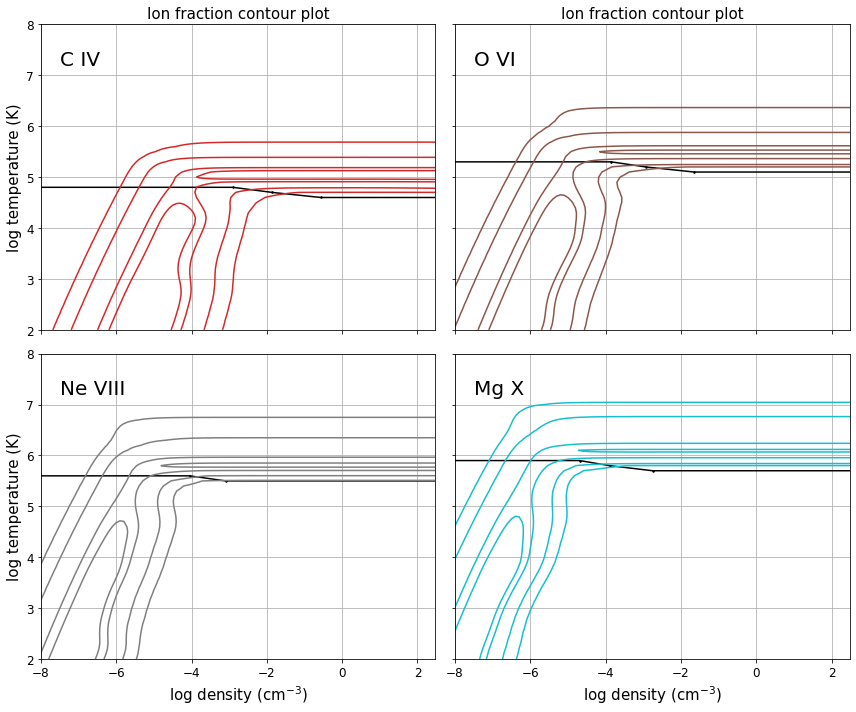

In [6]:
#figure 1
fig,axes = plt.subplots(2,2,figsize = (12,10),sharex = True,sharey = True)
for i in range(4):
    ion = {0:'C IV',2:'O VI',1:'Ne VIII',3:'Mg X'}[i]
    ax = axes[i%2,i//2]
    plot_contours([ion],0.0,show_cutoffs= 'black',levels = [.001,.01,.1,.2],\
                  data = d,cutoffs = c,ax = ax,radfield = 'HM12',fig=fig,show_values=False)
    ax.text(-7.5,7.2,ion,size = 20)
    if i//2==0:
        ax.set_ylabel('log temperature (K)',size = 15)
    elif i//2==1:
        ax.set_ylabel('')
    if i%2==0:
        ax.set_xlabel('')
        ax.set_title('Ion fraction contour plot',size = 15)
        ax.set_ylim(2,7.95)
    elif i%2 == 1:
        ax.set_title('')
        ax.set_xlabel('log density (cm'+r'$^{-3}$)',size = 15)

    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid()
    ax.get_legend().remove()
plt.subplots_adjust(wspace=0.02, hspace=0.025)
plt.tight_layout()
fig.savefig("pi_ci_paper_plots/1_contour_plots.png",dpi = 100,bbox_inches='tight')

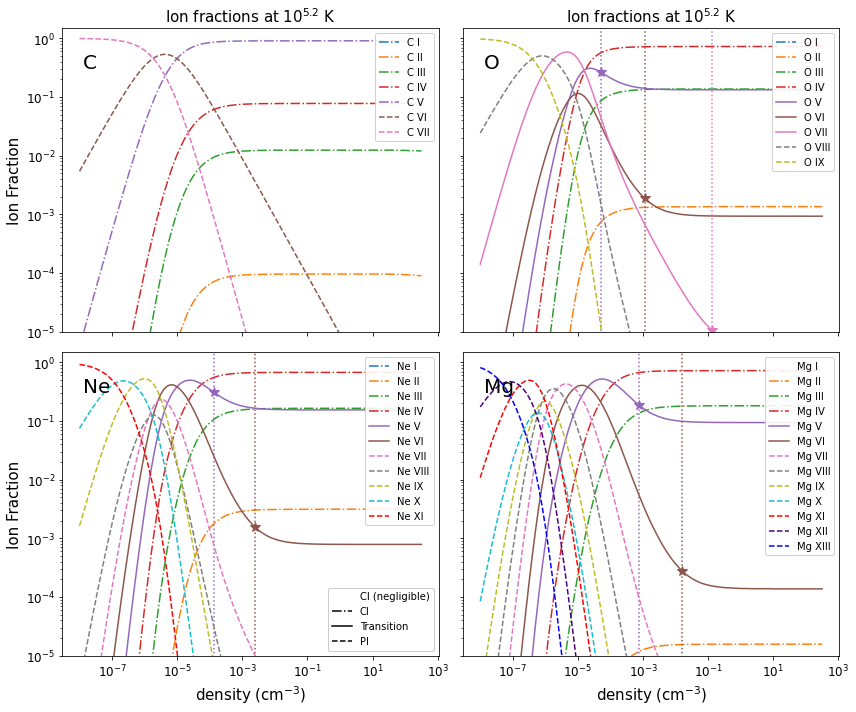

In [7]:
#figure 2
fig,axes = plt.subplots(2,2,figsize = (12,10),sharex = True,sharey = True)
for i in range(4):
    atom = {0:'C',2:'O',1:'Ne',3:'Mg'}[i]
    ax = axes[i%2,i//2]
    logt = 5.2
    plot_fracs_at_temp(atom,0.0,10**logt,data = d,cutoffs = c,show_mechanism=True,\
                       ax = ax,legend_params = {'loc':'upper right','framealpha':0.9})
    ax.text(10**-7.9,10**-.5,atom,size = 20)
    if i//2==0:
        ax.set_ylabel('Ion Fraction',size = 15)
    elif i//2==1:
        ax.set_ylabel('')
    if i%2==0:
        ax.set_xlabel('')
        string='Ion fractions at $10^{%.1f}$ K'%logt
        raw_string = r"%s"%string
        ax.set_title(raw_string,size = 15)
    elif i%2 == 1:
        ax.set_title('')
        ax.set_xlabel('density (cm'+r'$^{-3}$)',size = 15)

    ax.tick_params(axis='both', which='major', labelsize=12)
 
    if i==1:
        labels_colors_dict = {'CI (negligible)':'','CI':'-.','Transition':'-','PI':'--'}
        add_custom_legend(ax,labels_colors_dict,loc = None,bbox = None,keep_old_legend = True)
plt.subplots_adjust(wspace=0.02, hspace=0.025)
plt.tight_layout()
fig.savefig("pi_ci_paper_plots/2_frac_dens.png",dpi = 100,bbox_inches='tight')

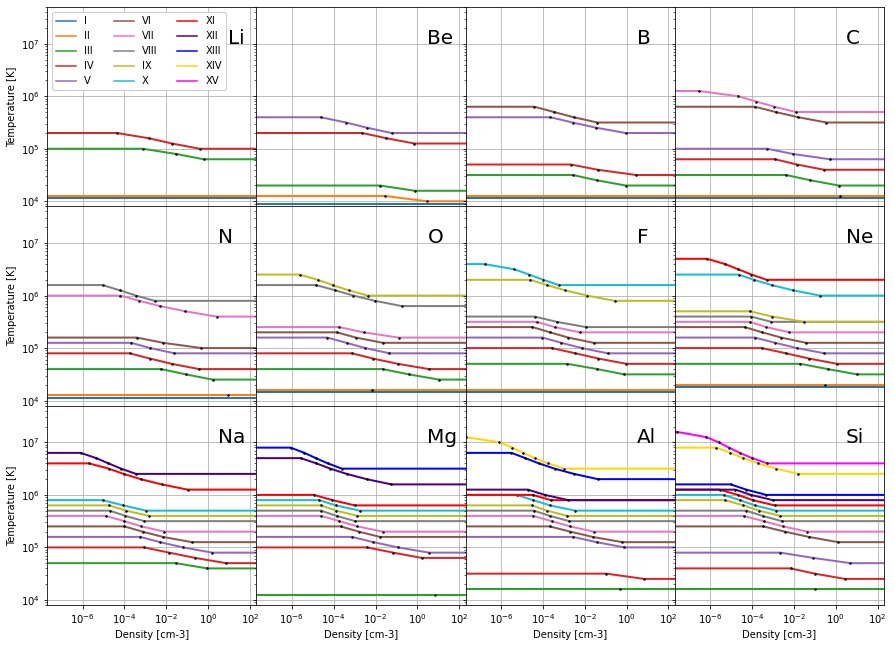

In [8]:

atoms = ['Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si']
redshift = 0

fig,axes = plt.subplots(3,4,figsize = (15,11),sharex = True,sharey = True,squeeze = False)
for j,atom in enumerate(atoms):
    ax = axes[j//4,j%4]
    plot_cutoffs(atom,redshift,ax=ax,data = d,cutoffs = c,linewidth = 2,first_offset = .1)
    if j % 4 == 0:
        ax.set_ylabel('Temperature [K]')
    else:
        ax.set_ylabel('')
    if j // 4 == 2:
        ax.set_xlabel('Density [cm-3]')
    else:
        ax.set_xlabel('')
    ax.set_title('')
    ax.set_ylim(8e3,5e7)
    ax.set_xlim(2e-8,2e2)
    if j!=0:
        ax.text(3e0,1e7,atom,size = 20)
    else:
        ax.text(9e0,1e7,atom,size = 20)
    ax.grid()
    ax.get_legend().remove()
    legend_dict = {}
for i,value in enumerate(range(1,16)):
    legend_dict[roman.toRoman(value)] = cycle_colors[i]
add_custom_legend(axes[0][0],legend_dict,loc = 'upper left',keep_old_legend=False,ncol = 3)
plt.subplots_adjust(wspace=0, hspace=0.0)
fig.savefig("pi_ci_paper_plots/3_cutoffs.png",dpi = 100,bbox_inches='tight')



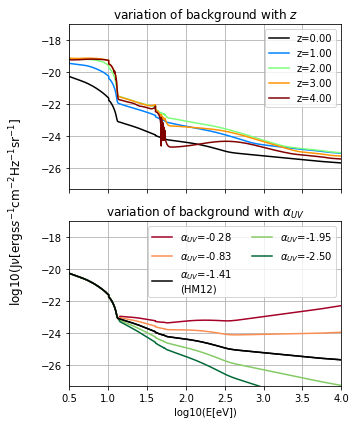

In [8]:
cmap = matplotlib.cm.get_cmap('jet')
def closest_to(hm12_redshifts,z):
    return np.argmin(np.abs(hm12_redshifts-z))
fig,axes = plt.subplots(2,1,sharex = True,sharey = True,figsize = (5,6))
ax = axes[0]
is_to_use = np.zeros(5).astype(int)
for i,z in enumerate([0,1,2,3,4]):
    is_to_use[i] = (closest_to(hm12_redshifts,z))
zs_to_use = hm12_redshifts[is_to_use]
zs_to_use = [0,1,2,3,4]
for i,z in enumerate(zs_to_use):
    index = closest_to(hm12_redshifts,z)
    z_key = hm12_redshifts[index]
    if i==0:
        color = 'black'
    else:
        color = cmap(i/(len(zs_to_use)-1))
    ax.plot(xs[z_key],ys[z_key],label = f'z={z:.2f}',color = color)
ax.legend(loc = 'upper right')
ax.grid()
#ax.set_ylabel('log10(J$\\nu$[ergs$s^{-1}$cm$^{-2}$Hz$^{-1}$sr$^{-1}$]')
ax.set_title(r'variation of background with $z$')

ax = axes[1]
cmap2 = matplotlib.cm.get_cmap('RdYlGn')
background_alpha_dict = {-0.28:(a028_xs,a028_ys),
     -0.835:(a0835_xs,a0835_ys),
     -1.41:(hm12_xs,hm12_ys),
     -1.945:(a1945_xs,a1945_ys),
     -2.5:(a25_xs,a25_ys),
    }
for i,key in enumerate(background_alpha_dict.keys()):
    if key == -1.41:
        color = 'black'
        label = '$\\alpha_{UV}$'+f'={-1.41}\n'+'(HM12)'
    else:
        color = cmap2(i/(len(background_alpha_dict.keys())-1))
        label = '$\\alpha_{UV}$=%2.2f' % key
    ax.plot(background_alpha_dict[key][0],background_alpha_dict[key][1],label=label,color = color)
ax.plot(background_alpha_dict[-1.41][0],background_alpha_dict[-1.41][1],label=None,color = 'black')
ax.set_xlim(0.5,4)
ax.set_ylim(-27.3,-17)
ax.grid()
ax.legend(loc = 'upper right',ncol=2)
ax.set_xlabel('log10(E[eV])')
ax.set_title(r'variation of background with $\alpha_{UV}$')
fig.supylabel('log10(J$\\nu$[ergs$s^{-1}$cm$^{-2}$Hz$^{-1}$sr$^{-1}$]')
plt.tight_layout()
fig.savefig("pi_ci_paper_plots/4_uvb.png",dpi = 100,bbox_inches='tight')


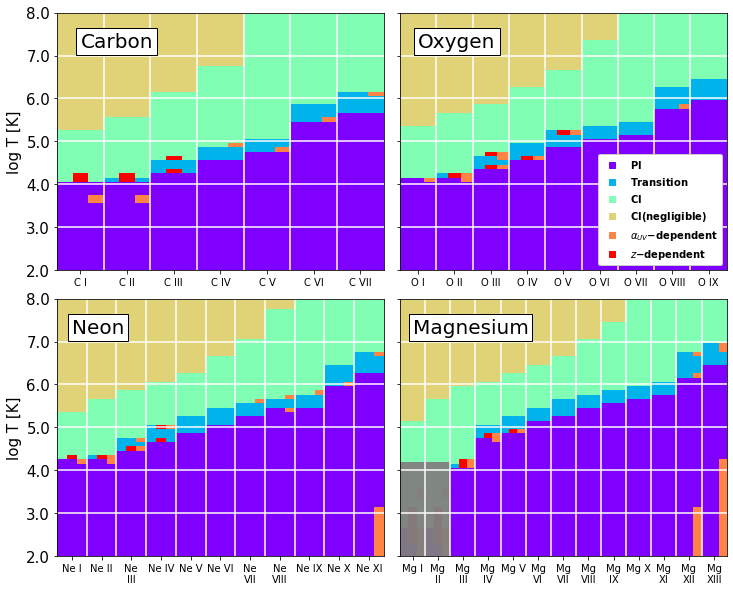

In [11]:
#figure 3

import matplotlib.patches as patches

def overlay_inappropriate_sections(atom,ax,xs,n=1):
    lowerbound = 2.0
    upperbound = 4.2
    low_x = ((xs[0]-1)*n-1.5+1.0)
    high_x = (xs[1]*n-1.5+1.0)
    data_offset = 2
    data_range = 10
    rect = patches.Rectangle((low_x, lowerbound-data_offset), 2*n, (upperbound-lowerbound)*data_range, 
                             linewidth=1, facecolor='grey',alpha = .95)
    if atom in ['Na','Mg','Al','Si']:
        ax.add_patch(rect)

long_atoms = {'C':'Carbon','N':'Nitrogen','O':'Oxygen','Ne':'Neon','Mg':'Magnesium','Si':'Silicon'}

atoms = ['C','Ne','O','Mg']
redshifts = [0,1,2,3,4]
radfields = ['HM12','a0.28','a0.835','a1.945','a2.5']

fig,axes = plt.subplots(2,2,figsize = (12,10),sharex = False,sharey = True)
for i,atom in enumerate(atoms):
    ax = axes[i%2][i//2]
    comparisons = ({'redshifts':redshifts,'radfields':'HM12'},{'redshifts':0,'radfields':radfields})
    vals = plot_transition_differences(atom,data = d,cutoffs = c,comparisons = comparisons,ax=ax,scaling_of_std = (3,2.3))
    ax.set_xlabel('')
    if i//2 == 0:
        ax.set_ylabel('log T [K]', size=15)
    ax.set_title('')
    ax.tick_params(axis='y', which='major', labelsize=15)

    t = ax.text(1,52,long_atoms[atom],size = 20,color = 'black')
    t.set_bbox(dict(facecolor='white'))
    if i==2:
        cmap = matplotlib.cm.get_cmap('rainbow')
        unique_values = np.unique(vals)
        legend_dict = {}
        for j,value in enumerate([r'$\bf{PI}$',r'$\bf{Transition}$',r'$\bf{CI}$',r'$\bf{CI (negligible)}$',r'$\alpha_{UV}\bf{ - dependent}$',r'$z \bf{- dependent}$']):
            legend_dict[value] = (cmap(unique_values[j])[:-1],'s','')
        add_custom_legend(ax,legend_dict,loc = 'lower right',bbox = (1,0),keep_old_legend=False)

    xs = [1,2]
    n=3
    overlay_inappropriate_sections(atom,ax,xs,n)


plt.subplots_adjust(wspace=0.05, hspace=.11)
fig.savefig("pi_ci_paper_plots/5_transitions_zdep.png",dpi = 100,bbox_inches='tight')


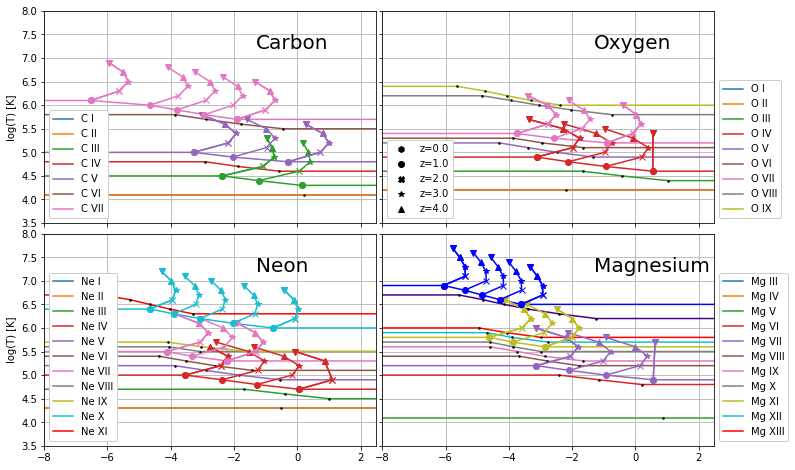

In [9]:
#figure 4

long_atoms = {'C':'Carbon','N':'Nitrogen','O':'Oxygen','Ne':'Neon','Mg':'Magnesium','Si':'Silicon'}
atoms = ['C','Ne','O','Mg']
redshifts = [0,1,2,3,4]

ignore = ['Na I','Na II','Mg I','Mg II','Al I','Al II','Si I','Si II']

fig,axes = plt.subplots(2,2,figsize = (12,8),sharex = True,sharey = True)
for i,atom in enumerate(atoms):
    ax = axes[i%2][i//2]
    redshift = redshifts[0]
    plot_cutoffs(atom,redshift,data = d,cutoffs = c,ax=ax,\
                     log='values')
    connect_cutoffs(atom,[0,1,2,3,4],ax=ax,data=d,cutoffs=c,max_num_ions=3)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')
    if i//2==0:
        ax.set_ylabel("log(T) [K]")
    ax.text(-1.3,7.2,long_atoms[atom],size = 20)
    ax.grid()
    legend_dict1 = {}
    for ion in get_ions(atom):
        if ion not in ignore:
            legend_dict1[ion]=None
    legend_dict2 = {}
    for j,redshift in enumerate(redshifts):
        legend_dict2["z=%.1f"%redshift] = all_marker_names[j]
    if i in [0,1]:
        add_custom_legend(ax,legend_dict1,loc = 'lower left',bbox = (0,0),keep_old_legend=False)
    elif i == 2:
        add_custom_legend(ax,legend_dict1,loc = 'lower left',bbox = (1,0),keep_old_legend=False)
        add_custom_legend(ax,legend_dict2,loc = 'lower left',bbox = (0,0),keep_old_legend=True)
    elif i == 3:
        add_custom_legend(ax,legend_dict1,loc = 'lower left',bbox = (1,0),keep_old_legend=False)
    ax.set_ylim(3.5,8)
plt.subplots_adjust(wspace=.02, hspace=.05)

fig.savefig("pi_ci_paper_plots/6_dens_zdep.png",dpi = 150,bbox_inches='tight')


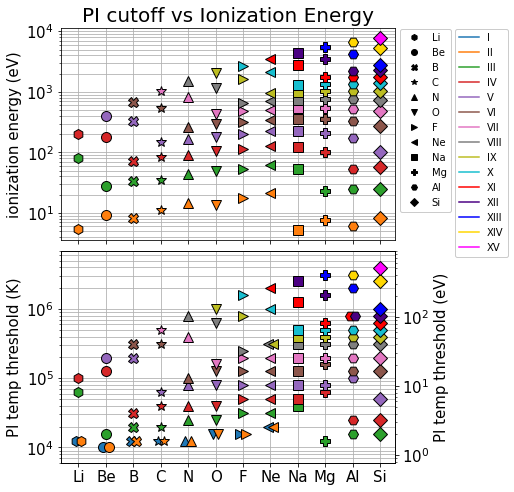

In [8]:
fig,axes = plt.subplots(2,1,figsize = (6,8),sharex = True,sharey = False)
ax = axes[0]
view_energies(atoms = a,ions=io,ionization_energy_dict = e,funky_symbols = True,ax=ax,grid = True)
ax.set_title('PI cutoff vs Ionization Energy',size = 20)
ax = axes[1]
view_cutoffs(atoms = a,ions=io,ionization_energy_dict = e,PI_cutoff_temps_dict = c2,
             funky_symbols = True,ax=ax,legend = False,grid = True)
#ax.set_ylim(8e3,5e6)

plt.subplots_adjust(wspace=.02, hspace=.05)

fig.savefig("pi_ci_paper_plots/7_energy_and_cutoff.png",dpi = 150,bbox_inches='tight')



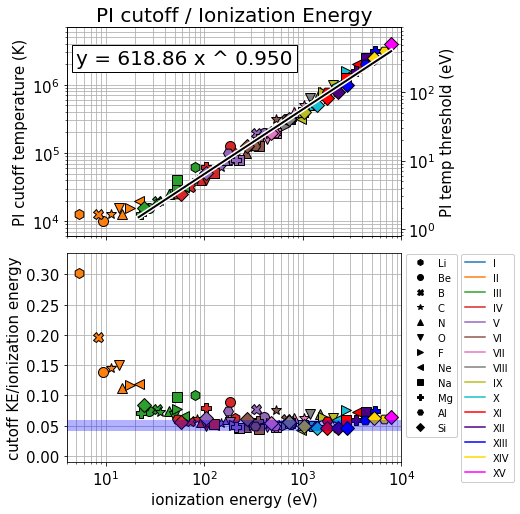

In [19]:
fig,axes = plt.subplots(2,1,figsize = (6,8),sharex = True,sharey = False)
ax = axes[0]
plot_cutoffs_by_energies(atoms = a,ions=io,ionization_energy_dict = e,PI_cutoff_temps_dict=c2,
                         legend = False,ax=ax,linecolor = 'black',lineedgecolor = 'white')#,xlims_for_linreg = (8e1,8e3))
ax.set_xlabel('')

ax.set_title('PI cutoff / Ionization Energy',size = 20)
ax = axes[1]
xlims = (4e0,1e4)
ybox = (0.041,0.06)
rect = patches.Rectangle((xlims[0],ybox[0]), xlims[1]-xlims[0], ybox[1]-ybox[0], 
                             linewidth=1, facecolor='blue',alpha = .3,zorder = 100)
plot_cutoffs_by_energies(atoms = a,ions=io,ionization_energy_dict = e,PI_cutoff_temps_dict=c2,units = 'relative',ax=ax)
ax.add_patch(rect)
plt.subplots_adjust(hspace=.08)

fig.savefig("pi_ci_paper_plots/8_energy_over_cutoff.png",dpi = 150,bbox_inches='tight')



<ipython-input-9-522e6963420d>:24: RuntimeWarning: divide by zero encountered in true_divide
  to_plot_ind = (current_term/corona_cie[j])**invert
<ipython-input-9-522e6963420d>:37: RuntimeWarning: divide by zero encountered in reciprocal
  to_plot2 = (cloudy_cie[i])**invert
<ipython-input-9-522e6963420d>:24: RuntimeWarning: divide by zero encountered in reciprocal
  to_plot_ind = (current_term/corona_cie[j])**invert
<ipython-input-9-522e6963420d>:24: RuntimeWarning: invalid value encountered in true_divide
  to_plot_ind = (current_term/corona_cie[j])**invert
<ipython-input-9-522e6963420d>:36: RuntimeWarning: divide by zero encountered in reciprocal
  to_plot = (current_term/sum_of_terms)**invert
<ipython-input-9-522e6963420d>:36: RuntimeWarning: overflow encountered in reciprocal
  to_plot = (current_term/sum_of_terms)**invert


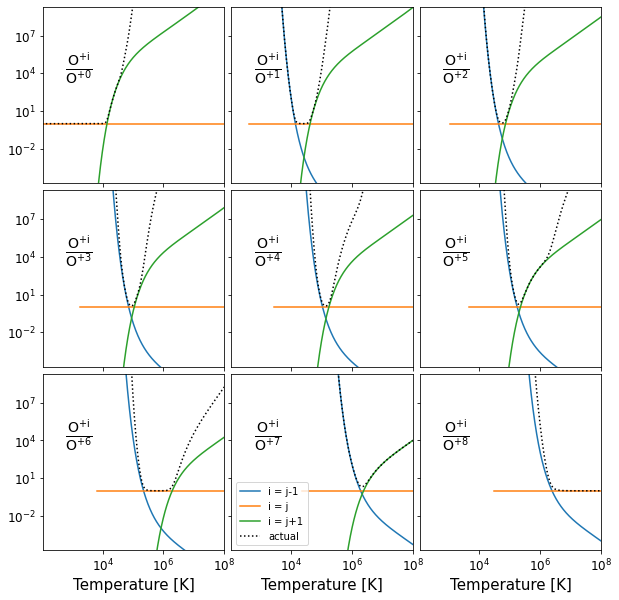

In [9]:
energies,corona_temps,corona_cie = get_coronal_approx('O',e = e)
cloudy_temps,cloudy_cie = get_cloudy_cie('O',d=d)

sum_of_terms = np.sum(corona_cie,axis = 0)
invert = -1

fig,axes = plt.subplots(3,3,figsize = (10,10),sharex = True,sharey = True)

plot_cloudy = False
plot_indlines = True
plot_approx = False
plot_actual = True

for i in range(0,len(energies)):
    current_term = corona_cie[i]
    ax = axes[i//3,i%3]
    to_plot3 = corona_temps*0
    for k,j in enumerate(range(i-1,i+2)):
        if j<0 or j >= len(energies):
            continue
        to_plot_ind = (current_term/corona_cie[j])**invert
        to_plot3 += to_plot_ind
        if k==0:
            ion = 'i = j-1'
        elif k==1:
            ion = 'i = j'
        elif k==2:
            ion = 'i = j+1'
        if plot_indlines:
            ax.loglog(corona_temps,to_plot_ind,color = cycle_colors[k],label = ion)
        if k==2 and plot_approx:
            ax.loglog(corona_temps,to_plot3,color = 'k',label = None)
    to_plot = (current_term/sum_of_terms)**invert
    to_plot2 = (cloudy_cie[i])**invert
    if plot_cloudy:
        ax.loglog(cloudy_temps,to_plot2,'--',color = 'red',label = 'Cloudy')
    if plot_actual:
        ax.loglog(corona_temps,to_plot,':',color = 'k',label = 'actual')
    if i==7:
        ax.legend(loc='lower left')
    if invert:
        ax.set_ylim(1.9e-5,2e9)
    else:
        ax.set_ylim(1e-10,1e5)
    ax.set_xlim(1.1e2,1e8)
    ion = 'O '+roman.toRoman(i+1)
    string='$\\frac{\\rm{O}^{+i}}{\\rm{O^{+%d}}}$'%i
    raw_string = r"%s"%string
    ax.text(6e2,1e4,raw_string,size = 20)
    if i%3 == 0:
        pass
        #ax.set_ylabel('ratio')
    if i//3 == 2:
        ax.set_xlabel('Temperature [K]',size = 15)
    #ax.grid(which='both')
    ax.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace=.04,wspace = .04)

        
fig.savefig("pi_ci_paper_plots/9_coronal_approx.png",dpi = 150,bbox_inches='tight')


/Users/claytonstrawn/pi_or_ci/pi_or_ci/contour_plots.py:134: RuntimeWarning: divide by zero encountered in true_divide
  C = np.log10(tocompare2/tocompare1)
/Users/claytonstrawn/pi_or_ci/pi_or_ci/contour_plots.py:134: RuntimeWarning: invalid value encountered in true_divide
  C = np.log10(tocompare2/tocompare1)
/Users/claytonstrawn/pi_or_ci/pi_or_ci/contour_plots.py:134: RuntimeWarning: divide by zero encountered in log10
  C = np.log10(tocompare2/tocompare1)


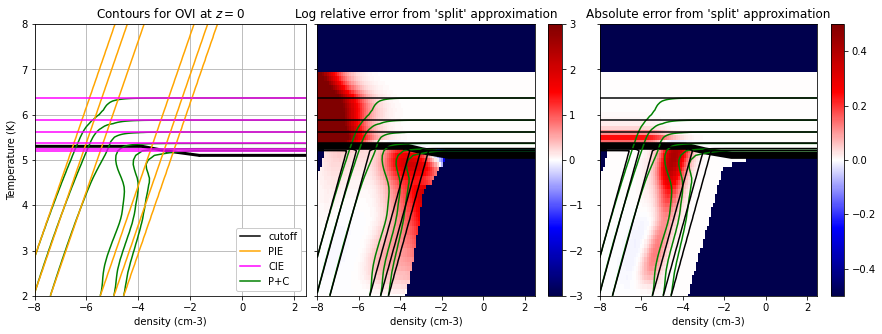

In [12]:
color1 = 'green'
color2 = 'orange'
color3 = 'magenta'
color4 = 'black'

fig,axes = plt.subplots(1,3,figsize = (15,5),sharex = True,sharey = True)
ax = axes[0]
mylevels = [.001,.01,.1]
ax = plot_contours(['O VI'],0.0, show_cutoffs= 'black',data = d,cutoffs = c,mechanism= 'both',ax = ax,colors = color1,cutoff_linewidth = 3,levels = mylevels)
ax = plot_contours(['O VI'],0.0,data = d,cutoffs = c,mechanism= 'PI',ax = ax,colors = color2,levels = mylevels)
ax = plot_contours(['O VI'],0.0,data = d,cutoffs = c,mechanism= 'CI',ax = ax,colors = color3,levels = mylevels)
ax.grid()
ax.set_title(r'Contours for OVI at $z=0$')
legend_dict = {'cutoff':'black','PIE':color2,'CIE':color3,'P+C':color1}
add_custom_legend(ax,legend_dict,loc = 'lower right',bbox = (1,0),keep_old_legend=False)
ax = axes[1]
ax = frac_ratio('O VI',0.0, show_cutoffs= 'black',data=d,cutoffs=c,ax = ax)
ax = plot_contours(['O VI'],0.0,data = d,cutoffs = c,mechanism= 'both',ax = ax,colors = color1,levels = mylevels)
ax = plot_contours(['O VI'],0.0,data = d,cutoffs = c,mechanism= 'split',ax = ax,colors = color4,levels = mylevels)
ax.get_legend().remove()
ax.set_ylabel('')
ax.set_title("Log relative error from 'split' approximation")
#ax.grid()
ax = axes[2]
ax = frac_ratio('O VI',0.0, show_cutoffs= 'black',data=d,cutoffs=c,ax = ax,log = False)
ax = plot_contours(['O VI'],0.0,data = d,cutoffs = c,mechanism= 'both',ax = ax,colors = color1,levels = mylevels)
ax = plot_contours(['O VI'],0.0,data = d,cutoffs = c,mechanism= 'split',ax = ax,colors = color4,levels = mylevels)
ax.get_legend().remove()
ax.set_ylabel('')
ax.set_title("Absolute error from 'split' approximation")
#ax.grid()
plt.subplots_adjust(hspace=.08,wspace = .04)
#plt.tight_layout()

fig.savefig("pi_ci_paper_plots/10_split_approx.png",dpi = 150,bbox_inches='tight')



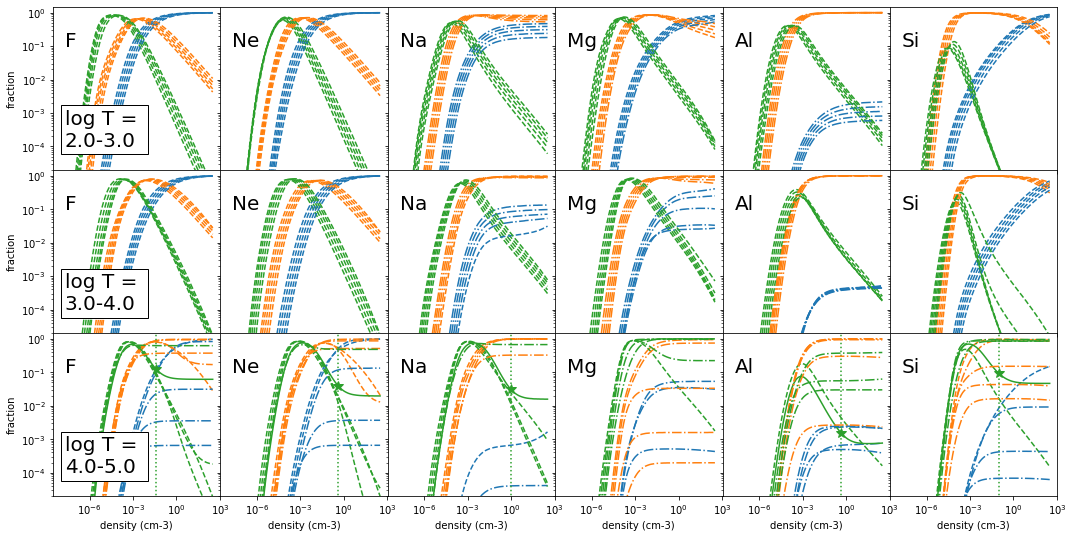

In [4]:
t = 10.**2.9
atoms = ['F','Ne','Na','Mg','Al','Si']
nrows = 3
size_of_row = 1.0#dex
lines_per_row = 5
fig,axes = plt.subplots(nrows,len(atoms),figsize = (3*len(atoms),3*nrows),sharex = True,sharey = True,squeeze=False)
nions = 3
for j,atom in enumerate(atoms):
    for i,tdex in enumerate(np.arange(2,2+size_of_row*nrows,size_of_row)):
        for logt in np.arange(tdex,tdex+size_of_row,size_of_row/lines_per_row):
            t = 10.**logt
            redshift = 0.00
            bold_last = False
            firstions = get_ions(atom)[:nions]
            ax = axes[i][j]
            plot_fracs_at_temp(atom,redshift,t,ions = firstions,data = d,cutoffs = c,
                               show_mechanism=True,bold_last = bold_last,ax=ax,
                               threshold = .04,
                               legend_params = {'loc':'lower left',
                                                'bbox_to_anchor':(0,0),
                                                'framealpha': 1.0})
            ax.set_xlabel('')
            ax.set_ylabel('')
        ax.set_ylim(2e-5,1.5e0)
        ax.text(2e-8,1e-1,atom,size = 20)
        if j==0:
            ax.text(2e-8,1e-4,f'log T = \n{tdex}-{tdex+size_of_row}',size = 20,
                    bbox=dict(facecolor='white', edgecolor='black'))
            ax.set_ylabel('fraction')
        if i==nrows-1:
            ax.set_xlabel('density (cm-3)')
    
for axe in axes:
    for ax in axe:
        try:
            ax.get_legend().remove()
            ax.set_title('')
        except:
            pass
plt.subplots_adjust(hspace=0,wspace = 0)
fig.savefig("pi_ci_paper_plots/A1_high_atom_low_ion_weirdness.png",dpi = 150,bbox_inches='tight')

